## Prediction of Medical Provider Fraud

# Problem Statement :

 - ### Predict the probability that a provider is potential fraud  and flag them accordingly.

 - ### Detect Bias in Pre Train & Post Train Dataset.

 - ### Detect the important predictors which are impacting the final prediction 
 
 - ###  Explain the final prediction using Exlainable AI modules - SHAPley, LIME


### Mounting the google drive

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/')

### Importing the libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.metrics import confusion_matrix,roc_curve,accuracy_score,roc_auc_score,classification_report
import pickle
from scipy import stats
import time
from sklearn.model_selection import GridSearchCV,KFold

from pylab import rcParams

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

import os


import matplotlib.pyplot as plt
import seaborn as sns


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the training data

In [3]:
#cms_prov_drug = pd.read_csv("/content/drive/MyDrive/CMS/Medicare_Part_D_Prescribers_by_Provider_and_Drug_2019_12_31.csv")

#cms_train154 = pd.read_csv("/content/drive/MyDrive/CMS/Train-1542865627584.csv")

#cms_train_bene = pd.read_csv("/content/drive/MyDrive/CMS/Train_Beneficiarydata-1542865627584.csv")

#cms_train_inpatient = pd.read_csv("/content/drive/MyDrive/CMS/Train_Inpatientdata-1542865627584.csv")
#cms_train_outpatient = pd.read_csv("/content/drive/MyDrive/CMS/Train_Outpatientdata-1542865627584.csv")


In [4]:
cms_train154 = pd.read_csv("Train-1542865627584.csv")

cms_train_bene = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")

cms_train_inpatient = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
cms_train_outpatient = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

In [5]:
print("cms_train154.shape: ",cms_train154.shape  )
print("cms_train_bene.shape :", cms_train_bene.shape)
print("cms_train_inpatient.shape: ", cms_train_inpatient.shape)
print("cms_train_outpatient.shape: ", cms_train_outpatient.shape)

cms_train154.shape:  (5410, 2)
cms_train_bene.shape : (138556, 25)
cms_train_inpatient.shape:  (40474, 30)
cms_train_outpatient.shape:  (517737, 27)


In [6]:
print("cms_train154.columns: ",cms_train154.columns )
print("cms_train_bene.columns :", cms_train_bene.columns)
print("cms_train_inpatient.columns: ", cms_train_inpatient.columns)
print("cms_train_outpatient.columns: ", cms_train_outpatient.columns)

cms_train154.columns:  Index(['Provider', 'PotentialFraud'], dtype='object')
cms_train_bene.columns : Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')
cms_train_inpatient.columns:  Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid',

## LOADING TEST DATA

In [7]:
#cms_test154 = pd.read_csv("/content/drive/MyDrive/CMS/Test-1542969243754.csv")
#cms_test_bene = pd.read_csv("/content/drive/MyDrive/CMS/Test_Beneficiarydata-1542969243754.csv")
#cms_test_inpatient = pd.read_csv("/content/drive/MyDrive/CMS/Test_Inpatientdata-1542969243754.csv")
#cms_test_outpatient = pd.read_csv("/content/drive/MyDrive/CMS/Test_Outpatientdata-1542969243754.csv")

In [8]:
#cms_test_outpatient = pd.read_csv("/content/drive/MyDrive/CMS/Test_Outpatientdata-1542969243754.csv")

cms_test154 = pd.read_csv("Test-1542969243754.csv")
cms_test_bene = pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
cms_test_inpatient = pd.read_csv("Test_Inpatientdata-1542969243754.csv")
cms_test_outpatient = pd.read_csv("Test_Outpatientdata-1542969243754.csv")

In [9]:
print("cms_train154.shape: ",cms_train154.shape  )
print("cms_train_bene.shape :", cms_train_bene.shape)
print("cms_train_inpatient.shape: ", cms_train_inpatient.shape)
print("cms_train_outpatient.shape: ", cms_train_outpatient.shape)

print("cms_test154.shape: ",cms_test154.shape  )
print("cms_test_bene.shape :", cms_test_bene.shape)
print("cms_test_inpatient.shape: ", cms_test_inpatient.shape)
print("cms_test_outpatient.shape: ", cms_test_outpatient.shape)

cms_train154.shape:  (5410, 2)
cms_train_bene.shape : (138556, 25)
cms_train_inpatient.shape:  (40474, 30)
cms_train_outpatient.shape:  (517737, 27)
cms_test154.shape:  (1353, 1)
cms_test_bene.shape : (63968, 25)
cms_test_inpatient.shape:  (9551, 30)
cms_test_outpatient.shape:  (125841, 27)


### Merge Train & Test data

In [10]:
# Merge Inpatient, Outpatient and beneficiary dataframe into a single patient dataset

cms_provider = pd.concat([cms_train154, cms_test154], axis=0)
print(cms_provider.shape)
                     

(6763, 2)


In [11]:
#cms_bene = pd.merge(cms_train_bene, cms_test_bene,how = 'outer', on = 'BeneID')

cms_bene = pd.concat([cms_train_bene, cms_test_bene], axis=0)
print(cms_bene.shape)

(202524, 25)


In [12]:
#cms_inpatient = pd.merge(cms_train_inpatient, cms_test_inpatient,how = 'outer', on = ['BeneID', 'ClaimID'])
cms_inpatient = pd.concat([cms_train_inpatient, cms_test_inpatient], axis=0)
print(cms_inpatient.shape)

(50025, 30)


In [13]:
#cms_outpatient = pd.merge(cms_train_outpatient, cms_test_outpatient,how = 'outer', on = ['BeneID', 'ClaimID'])
cms_outpatient = pd.concat([cms_train_outpatient, cms_test_outpatient], axis=0)
print(cms_outpatient.shape)

(643578, 27)



#### Missing value in cms_provider is due to Test data where Label data "PotentialFraud" is not present

In [14]:
cms_provider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 1352
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        6763 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 158.5+ KB


In [15]:
cms_bene.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202524 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           202524 non-null  object
 1   DOB                              202524 non-null  object
 2   DOD                              1995 non-null    object
 3   Gender                           202524 non-null  int64 
 4   Race                             202524 non-null  int64 
 5   RenalDiseaseIndicator            202524 non-null  object
 6   State                            202524 non-null  int64 
 7   County                           202524 non-null  int64 
 8   NoOfMonths_PartACov              202524 non-null  int64 
 9   NoOfMonths_PartBCov              202524 non-null  int64 
 10  ChronicCond_Alzheimer            202524 non-null  int64 
 11  ChronicCond_Heartfailure         202524 non-null  int64 
 12  ChronicCond_Kidne

#### Benficiary dataset -> Only Missing value is DOD column

In [16]:
cms_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50025 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  50025 non-null  object 
 1   ClaimID                 50025 non-null  object 
 2   ClaimStartDt            50025 non-null  object 
 3   ClaimEndDt              50025 non-null  object 
 4   Provider                50025 non-null  object 
 5   InscClaimAmtReimbursed  50025 non-null  int64  
 6   AttendingPhysician      49882 non-null  object 
 7   OperatingPhysician      29419 non-null  object 
 8   OtherPhysician          5703 non-null   object 
 9   AdmissionDt             50025 non-null  object 
 10  ClmAdmitDiagnosisCode   50025 non-null  object 
 11  DeductibleAmtPaid       48930 non-null  float64
 12  DischargeDt             50025 non-null  object 
 13  DiagnosisGroupCode      50025 non-null  object 
 14  ClmDiagnosisCode_1      50025 non-null 

In [17]:
cms_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643578 entries, 0 to 125840
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  643578 non-null  object 
 1   ClaimID                 643578 non-null  object 
 2   ClaimStartDt            643578 non-null  object 
 3   ClaimEndDt              643578 non-null  object 
 4   Provider                643578 non-null  object 
 5   InscClaimAmtReimbursed  643578 non-null  int64  
 6   AttendingPhysician      641866 non-null  object 
 7   OperatingPhysician      112221 non-null  object 
 8   OtherPhysician          242665 non-null  object 
 9   ClmDiagnosisCode_1      630547 non-null  object 
 10  ClmDiagnosisCode_2      400467 non-null  object 
 11  ClmDiagnosisCode_3      252523 non-null  object 
 12  ClmDiagnosisCode_4      156066 non-null  object 
 13  ClmDiagnosisCode_5      92310 non-null   object 
 14  ClmDiagnosisCode_6  

### Derive Inpatient & OutPatient Indicator column which will be used in marged data to detect patient type

In [18]:
#Function to calculate the unique count of columns for rach row
def N_unique_values(df):
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in df.values])

#### Inpatient & Putpatient dataset have multiple missing values.

In [19]:
cms_inpatient["IsInpatient"] = 1
cms_outpatient["IsInpatient"] = 0

### Analyze the categorical values in beneficiary dataset

In [20]:
# subset all categorical variables
cms_bene_categorical = cms_bene.select_dtypes(include=['object'])
cms_bene_categorical.columns

Index(['BeneID', 'DOB', 'DOD', 'RenalDiseaseIndicator'], dtype='object')

In [21]:
colist= [ 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']
for i in colist :
  print(cms_bene[i].value_counts())

2    132994
1     69530
Name: ChronicCond_Alzheimer, dtype: int64
1    103108
2     99416
Name: ChronicCond_Heartfailure, dtype: int64
2    136159
1     66365
Name: ChronicCond_KidneyDisease, dtype: int64
2    177111
1     25413
Name: ChronicCond_Cancer, dtype: int64
2    152144
1     50380
Name: ChronicCond_ObstrPulmonary, dtype: int64
2    128129
1     74395
Name: ChronicCond_Depression, dtype: int64
1    125177
2     77347
Name: ChronicCond_Diabetes, dtype: int64
1    139530
2     62994
Name: ChronicCond_IschemicHeart, dtype: int64
2    145534
1     56990
Name: ChronicCond_Osteoporasis, dtype: int64
2    148881
1     53643
Name: ChronicCond_rheumatoidarthritis, dtype: int64
2    185783
1     16741
Name: ChronicCond_stroke, dtype: int64


### Categorical variables in cms_train_bene file are having values 1 & 2.
2 means Chronic disease = "No" and 1 means "Yes".

### Let's replace the 2 with Zero. Hence after the mapping ->

### chronic condition :  "NO" is 0 and "YES" is 1

#### No dummy is required as they have only binary categorization


In [22]:
cms_bene = cms_train_bene.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

cms_bene = cms_bene.replace({'RenalDiseaseIndicator': 'Y'}, 1)

### Derive age from DOB & DOD in cms_train_bene file 
 
#### Treating the Missing DOD : Missing DOD means the person is alive and fill the missing values with the year when this data was extracted.

#### The last DOD value is 2009-12-01 ,which means Beneficiary Details data was extracted on 2009.
#### Hence fill the mising DOD with 2009





In [23]:
cms_bene.head(5)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       0                     0                          0   
2                       0                     0                          1   
3                       0                     1                          1   
4                       0                     1                          0   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         1                                1   
4                         0                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   0                         0                      0   
2                   0                         0                      0   
3                   0                         0                      0   
4                   0                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  
2                        90                     40  
3                      1810                    760  
4                      1790                   1200  

[5 rows x 25 columns]

In [24]:
#Creating a new variable 'IsDead' with flag 1 means Dead and 0 means not Dead

cms_bene.loc[cms_bene.DOD.isna(),'IsDead']=0
cms_bene.loc[cms_bene.DOD.notna(),'IsDead']=1
cms_bene.loc[:,'IsDead'].head(7)




0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
Name: IsDead, dtype: float64

### Derive new columns for in Patient data

#### Deriving days of admission in hospital

In [25]:
## As patient can be admitted for only for 1 day,lets add 1 to the difference of Discharge Date and Admission Date 

cms_inpatient['AdmissionDt'] = pd.to_datetime(cms_inpatient['AdmissionDt'] , format = '%Y-%m-%d')
cms_inpatient['DischargeDt'] = pd.to_datetime(cms_inpatient['DischargeDt'],format = '%Y-%m-%d')
cms_inpatient['AdmissionDuration'] = ((cms_inpatient['DischargeDt'] - cms_inpatient['AdmissionDt']).dt.days)+1


In [26]:
cms_inpatient['MismatchedAdmitCode'] = np.where(cms_inpatient['ClmAdmitDiagnosisCode'] == cms_inpatient['ClmDiagnosisCode_1'], 0, 1)

###  Merge the Benefitiary data with in patient & out patient data

In [27]:
cms_patient_mergeid = [i for i in cms_outpatient.columns if i in cms_inpatient.columns]

# Merge Inpatient, Outpatient and beneficiary dataframe into a single patient dataset
cms_patient_data = pd.merge(cms_inpatient, cms_outpatient,
                   left_on = cms_patient_mergeid,
                   right_on = cms_patient_mergeid,
                   how = 'outer').\
          merge(cms_bene,left_on='BeneID',right_on='BeneID',how='inner')

In [28]:
cms_patient_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'IsInpatient', 'AdmissionDuration',
       'MismatchedAdmitCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'Chronic

### Missing value treatment on merged beneficiary & in/out patient data

In [29]:

missing_columns = cms_patient_data.columns[cms_patient_data.isnull().sum() > 1]
missing_columns

Index(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'AdmissionDuration', 'MismatchedAdmitCode', 'DOD'],
      dtype='object')

In [30]:
cms_bene['DOB'] = pd.to_datetime(cms_bene['DOB'] , format = '%Y-%m-%d')
cms_bene['DOD'] = pd.to_datetime(cms_bene['DOD'],format = '%Y-%m-%d',errors='ignore')

cms_patient_data['age'] = pd.to_datetime(cms_patient_data['ClaimStartDt']) - pd.to_datetime(cms_patient_data['DOB'])
cms_patient_data['age'] = np.floor(cms_patient_data['age'].astype(str).str.extract('(\d+)').astype(int) / 365.24)


cms_patient_data['Age_Under_65'] = np.where(cms_patient_data.age < 65, 1, 0)

cms_patient_data['Age_65_upto_75'] = np.where((cms_patient_data.age >= 65) & (cms_patient_data.age < 75), 1, 0)
cms_patient_data['Age_75_upto_85'] = np.where((cms_patient_data.age >= 75) & (cms_patient_data.age < 85), 1, 0)

cms_patient_data['Age_85_or_Over'] = np.where(cms_patient_data.age >= 85, 1, 0)

cms_patient_data.head(5)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001   CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001   CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
4  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                      30          PHY347633                NaN   
4                      30          PHY381777                NaN   

  OtherPhysician AdmissionDt  ... IPAnnualReimbursementAmt  \
0            NaN  2009-04-12  ...                    36000   
1            NaN  2009-08-31  ...                    36000   
2      PHY324689  2009-09-17  ...                    36000   
3      PHY347633         NaT  ...                    36000   
4      PHY381777         NaT  ...                    36000   

   IPAnnualDeductibleAmt OPAnnualReimbursementAmt OPAnnualDeductibleAmt  \
0                   3204                       60                    70   
1                   3204                       60                    70   
2                   3204                       60                    70   
3                   3204                       60                    70   
4                   3204                       60                    70   

  IsDead   age Age_Under_65 Age_65_upto_75 Age_75_upto_85 Age_85_or_Over  
0    0.0  66.0            0              1              0              0  
1    0.0  66.0            0              1              0              0  
2    0.0  66.0            0              1              0              0  
3    0.0  66.0            0              1              0              0  
4    0.0  66.0            0              1              0              0  

[5 rows x 63 columns]

In [31]:
cms_race_dummy = pd.get_dummies(cms_patient_data["Race"], prefix = "Race" )
print(cms_race_dummy.head())

# concat dummy variables with categorical dataset
cms_patient_data = pd.concat([cms_patient_data, cms_race_dummy], axis=1)

   Race_1  Race_2  Race_3  Race_5
0       1       0       0       0
1       1       0       0       0
2       1       0       0       0
3       1       0       0       0
4       1       0       0       0


In [32]:
PhysicianList = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']
# Lets's count the number of Physicians for each record and store them in a new variable

cms_patient_data['N_UniquePhysician'] = N_unique_values(cms_patient_data[PhysicianList])


cms_patient_data['N_UniquePhysician'].value_counts()


1    487035
2    170498
3     14426
0      1783
Name: N_UniquePhysician, dtype: int64

#### Let's replace AttendingPhysician, OperatingPhysician, OtherPhysician, columns value with 0 and 1 where we have value we are replacing it with 1 and in place of null value we replace it with 0.


In [33]:


cms_patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = np.where(cms_patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].isnull(), 0, 1)


### Derive total number of physicians are attached with the claim of the patient

In [34]:



cms_patient_data['total_physicians'] = cms_patient_data['AttendingPhysician'] +  cms_patient_data['OperatingPhysician'] + cms_patient_data['OtherPhysician']

cms_patient_data['total_physicians']

0         1
1         2
2         2
3         2
4         2
         ..
673737    3
673738    2
673739    1
673740    2
673741    2
Name: total_physicians, Length: 673742, dtype: int64

# Treating missing values in DignosisGroupCode Count

In [35]:

count_DiagnosisGroupCode=cms_patient_data['DiagnosisGroupCode'].value_counts()
count_DiagnosisGroupCode=count_DiagnosisGroupCode[:20] # To show only top 20 codes 
count_DiagnosisGroupCode

882    216
183    201
884    201
885    196
887    195
883    194
939    192
168    192
180    190
949    189
166    189
177    188
208    186
876    186
945    186
202    185
181    184
946    184
198    183
188    183
Name: DiagnosisGroupCode, dtype: int64

#### Since DignosisGroupCode has maximum values as null, so we are s by creating a new column "IsDiagnosisCode" in which value will either "1" or "0" .
#### if groupDiagnosiscode  has null value in a claim then "IsDiagnosisCode" column value is 0 otherwise 1

In [36]:


cms_patient_data['IsDiagnosisCode'] = np.where(cms_patient_data.DiagnosisGroupCode.notnull(), 1, 0)


### Handling missing values for "DeductibleamtPaid" column

#### Check number of missing values in this variable

In [37]:

cms_patient_data['DeductibleAmtPaid'].isnull().sum()  

1081

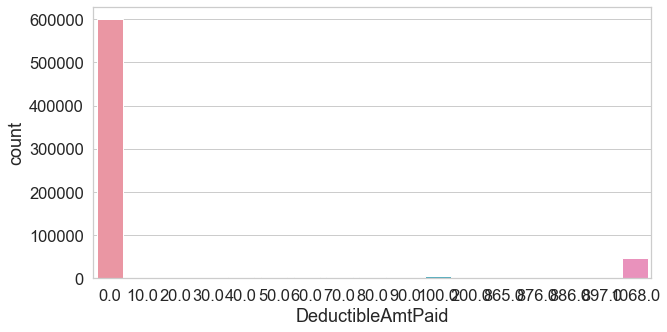

In [38]:
## Count Plot of "DeductibleAmtPaid" values

fig=plt.figure(figsize=(10,5))
sns.countplot(cms_patient_data['DeductibleAmtPaid'])

#### maximum values are 0 here

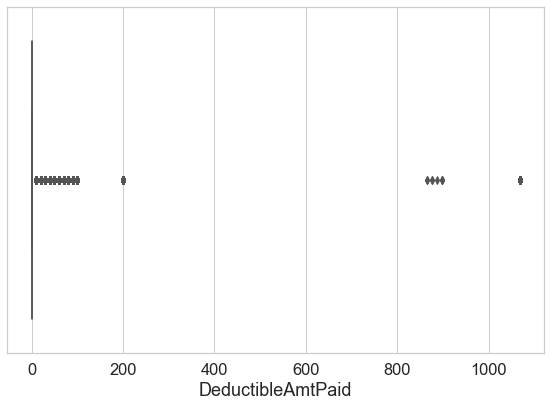

In [39]:
## Box plot of this "DeductibleAmtPaid", maximum values are 0 that shows here.

fig=plt.figure(figsize=(8,6))
sns.boxplot(cms_patient_data['DeductibleAmtPaid'])
fig.tight_layout()

In [40]:
## The above analysis tells that we can replace missing values with 0 

cms_patient_data['DeductibleAmtPaid'].fillna(0,inplace=True)

In [41]:
### creating one new variable "IsDeductibleAmtPaid" which tells is DeductibleAmtPaid Zero or not

cms_patient_data['IsDeductibleAmtPaid']=np.where(cms_patient_data['DeductibleAmtPaid']==0,0,1) 

0    600656
1     73086
Name: IsDeductibleAmtPaid, dtype: int64


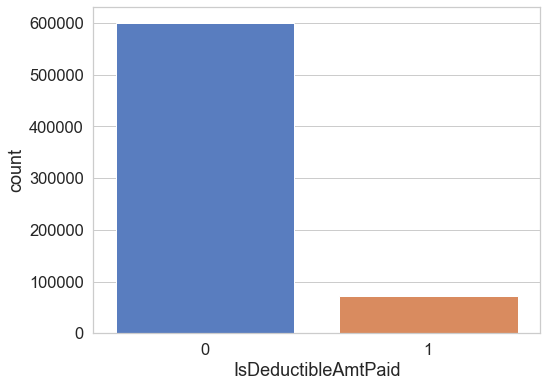

In [42]:
fig=plt.figure(figsize=(8,6))
sns.countplot(cms_patient_data['IsDeductibleAmtPaid'])

print(cms_patient_data['IsDeductibleAmtPaid'].value_counts())

In [43]:
### Handling missing values for "AdmitForDays" column, Count of missing values in this column

cms_patient_data['AdmissionDuration'].isnull().sum() 

624973

In [44]:
# Replace all missing value with 0 which indicates patients who was not admitted to hospital

cms_patient_data['AdmissionDuration'].fillna(0,inplace=True)

In [45]:
cms_patient_data['AdmissionDuration'].isnull().sum() 

0

In [46]:
### Count number of records
## From here we get the count of BeneID and ClaimId for each provider

## For Train 
cms_patient_data_cnt = cms_patient_data[['BeneID', 'ClaimID']].groupby(cms_patient_data['Provider']).nunique().reset_index()
cms_patient_data_cnt.rename(columns={'BeneID':'BeneID_count','ClaimID':'ClaimID_count'},inplace=True)

### Handling ClmProcedureCodes variables and missing values


In [47]:
#Convert ClmProcedure_vars to categorical value
cms_patient_data['ClmProcedureCode_1'] = cms_patient_data['ClmProcedureCode_1'].astype('object')
cms_patient_data['ClmProcedureCode_2'] = cms_patient_data['ClmProcedureCode_2'].astype('object')
cms_patient_data['ClmProcedureCode_3'] = cms_patient_data['ClmProcedureCode_3'].astype('object')
cms_patient_data['ClmProcedureCode_4'] = cms_patient_data['ClmProcedureCode_4'].astype('object')
cms_patient_data['ClmProcedureCode_5'] = cms_patient_data['ClmProcedureCode_5'].astype('object')
cms_patient_data['ClmProcedureCode_6'] = cms_patient_data['ClmProcedureCode_6'].astype('object')

ClmProcedure_vars = ['ClmProcedureCode_{}'.format(x) for x in range(1,7)]
print(ClmProcedure_vars)

['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']


In [48]:
## To Check how many null values are in each Clmprocedurecodes
cms_patient_data[ClmProcedure_vars].isnull().sum()

ClmProcedureCode_1    645721
ClmProcedureCode_2    667173
ClmProcedureCode_3    672579
ClmProcedureCode_4    673601
ClmProcedureCode_5    673732
ClmProcedureCode_6    673742
dtype: int64

In [49]:
cms_patient_data['ClmProcedureCode_1'].value_counts()

9904.0    1391
8154.0    1195
66.0      1062
3893.0    1016
3995.0     965
          ... 
9992.0       1
8211.0       1
9324.0       1
8212.0       1
11.0         1
Name: ClmProcedureCode_1, Length: 1171, dtype: int64

### This function helps us find the length of unique values in each row/record

In [50]:
cms_patient_data[ClmProcedure_vars]


ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3  \
0                     NaN                NaN                NaN   
1                    7092                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
673737                NaN                NaN                NaN   
673738                NaN                NaN                NaN   
673739                NaN                NaN                NaN   
673740                NaN                NaN                NaN   
673741                NaN                NaN                NaN   

       ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  
0                     NaN                NaN                NaN  
1                     NaN                NaN                NaN  
2                     NaN                NaN                NaN  
3                     NaN                NaN                NaN  
4                     NaN                NaN                NaN  
...                   ...                ...                ...  
673737                NaN                NaN                NaN  
673738                NaN                NaN                NaN  
673739                NaN                NaN                NaN  
673740                NaN                NaN                NaN  
673741                NaN                NaN                NaN  

[673742 rows x 6 columns]

### We count the number of procedureCode for each claim and store these value in a new variable

In [51]:

cms_patient_data['N_Procedure'] = N_unique_values(cms_patient_data[ClmProcedure_vars])

## So from here we get to know that 534901 claims/records has 0 claim procedure codes, 17820 claims/records has 1 claimprocedurecodes and so on

cms_patient_data['N_Procedure'].value_counts()

0    645721
1     21452
2      5406
3      1022
4       131
5        10
Name: N_Procedure, dtype: int64

### Handling of 'ClmDiagnosisCode'

In [52]:


# We count the number of claims
ClmDiagnosisCode_vars =['ClmAdmitDiagnosisCode'] + ['ClmDiagnosisCode_{}'.format(x) for x in range(1, 11)]


ClmDiagnosisCode_vars

['ClmAdmitDiagnosisCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10']

In [53]:
# Lets's count the number of CLMDiagnosisCode for each record and store them in a new variable

cms_patient_data['N_UniqueDiagnosis_Claims'] = N_unique_values(cms_patient_data[ClmDiagnosisCode_vars])


cms_patient_data['N_UniqueDiagnosis_Claims'].value_counts()

1     183750
2     159595
3     104476
4      69272
5      36644
10     26786
9      25230
6      23636
7      16628
8      13921
0      10089
11      3715
Name: N_UniqueDiagnosis_Claims, dtype: int64

In [54]:
cms_patient_data.head(6)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001   CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001   CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
4  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   
5  BENE11011   CLM38412   2009-02-14  2009-02-22  PRV52405   

   InscClaimAmtReimbursed  AttendingPhysician  OperatingPhysician  \
0                   26000                   1                   0   
1                    5000                   1                   1   
2                    5000                   1                   0   
3                      30                   1                   0   
4                      30                   1                   0   
5                    5000                   1                   1   

   OtherPhysician AdmissionDt  ... Race_1  Race_2 Race_3 Race_5  \
0               0  2009-04-12  ...      1       0      0      0   
1               0  2009-08-31  ...      1       0      0      0   
2               1  2009-09-17  ...      1       0      0      0   
3               1         NaT  ...      1       0      0      0   
4               1         NaT  ...      1       0      0      0   
5               1  2009-02-14  ...      0       1      0      0   

  N_UniquePhysician total_physicians IsDiagnosisCode IsDeductibleAmtPaid  \
0                 1                1               1                   1   
1                 1                2               1                   1   
2                 2                2               1                   1   
3                 1                2               0                   0   
4                 1                2               0                   0   
5                 3                3               1                   1   

  N_Procedure N_UniqueDiagnosis_Claims  
0           0                       10  
1           1                        3  
2           0                        7  
3           0                        6  
4           0                        3  
5           1                       10  

[6 rows x 73 columns]

In [55]:
cms_patient_data["Gender"].value_counts()

2    389839
1    283903
Name: Gender, dtype: int64

In [56]:
cms_patient_data['Gender']=cms_patient_data['Gender'].replace(2,0)

In [57]:
cms_patient_data["Gender"].value_counts()

0    389839
1    283903
Name: Gender, dtype: int64

In [58]:
cms_patient_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'IsInpatient', 'AdmissionDuration',
       'MismatchedAdmitCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'Chronic

In [59]:
cms_patient_data["Race"].value_counts()

1    569140
2     67141
3     23273
5     14188
Name: Race, dtype: int64

## Create dummy variables for Race column ->convert into dummies - one hot encoding

In [60]:
cms_patient_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'IsInpatient', 'AdmissionDuration',
       'MismatchedAdmitCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'Chronic

In [61]:
cms_patient_data.shape

(673742, 73)

In [62]:
# subset all categorical variables
cms_patient_categorical = cms_patient_data.select_dtypes(include=['object'])
cms_patient_categorical.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOB',
       'DOD', 'RenalDiseaseIndicator'],
      dtype='object')

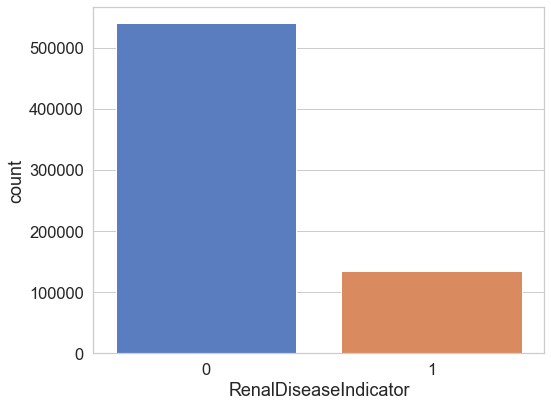

In [63]:
## Convert RenalDiseaseIndicator from object to integer

cms_patient_data['RenalDiseaseIndicator']=cms_patient_data.RenalDiseaseIndicator.astype(int) 

fig=plt.figure(figsize=(8,6))
sns.countplot(cms_patient_data['RenalDiseaseIndicator'])
fig.tight_layout()

In [64]:
cms_provider.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [65]:
print(cms_patient_data.shape)
print(cms_provider.shape)

(673742, 73)
(6763, 2)


In [66]:
cms_patient_data["Provider"].nunique()

6760

In [67]:
cms_provider["PotentialFraud"].value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [68]:
cms_test154

Provider
0     PRV51002
1     PRV51006
2     PRV51009
3     PRV51010
4     PRV51018
...        ...
1348  PRV57713
1349  PRV57726
1350  PRV57745
1351  PRV57749
1352  PRV57750

[1353 rows x 1 columns]

In [69]:
cms_train154["PotentialFraud"].value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [70]:
cms_provider[cms_provider["Provider"] == "PRV57745"]

Provider PotentialFraud
1350  PRV57745            NaN

In [71]:
cms_provider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 1352
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        6763 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 158.5+ KB


In [72]:
cms_provider = cms_provider.fillna("Test")

In [73]:
cms_provider["PotentialFraud"].value_counts()

No      4904
Test    1353
Yes      506
Name: PotentialFraud, dtype: int64

In [74]:
cms_patient_provider = pd.merge(cms_patient_data, cms_provider, how = "left", on = "Provider")

In [75]:
print(cms_patient_provider.columns)
print(cms_patient_provider.shape)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'IsInpatient', 'AdmissionDuration',
       'MismatchedAdmitCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'Chronic

In [76]:
cms_patient_provider["PotentialFraud"].value_counts()

No      345415
Yes     212796
Test    115531
Name: PotentialFraud, dtype: int64

### Merge with Provider data

#### Deriving claim duration

In [77]:
## As patient can be admitted for only for 1 day,lets add 1 to the difference of Discharge Date and Admission Date 

cms_patient_provider['ClaimStartDt'] = pd.to_datetime(cms_patient_provider['ClaimStartDt'] , format = '%Y-%m-%d')
cms_patient_provider['ClaimEndDt'] = pd.to_datetime(cms_patient_provider['ClaimEndDt'],format = '%Y-%m-%d')
cms_patient_provider['ClaimDuration'] = ((cms_patient_provider['ClaimEndDt'] - cms_patient_provider['ClaimStartDt']).dt.days)+1

In [78]:
cms_patient_provider.head(2)

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31 2009-09-02  PRV55907   

   InscClaimAmtReimbursed  AttendingPhysician  OperatingPhysician  \
0                   26000                   1                   0   
1                    5000                   1                   1   

   OtherPhysician AdmissionDt  ... Race_3  Race_5 N_UniquePhysician  \
0               0  2009-04-12  ...      0       0                 1   
1               0  2009-08-31  ...      0       0                 1   

  total_physicians IsDiagnosisCode IsDeductibleAmtPaid N_Procedure  \
0                1               1                   1           0   
1                2               1                   1           1   

  N_UniqueDiagnosis_Claims PotentialFraud ClaimDuration  
0                       10            Yes             7  
1                        3             No             3  

[2 rows x 75 columns]

In [79]:

#cms_patient_provider.drop(["ClaimStartDt", "ClaimEndDt"], axis = 1, inplace=True)

In [80]:
cms_patient_provider.head(2)

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31 2009-09-02  PRV55907   

   InscClaimAmtReimbursed  AttendingPhysician  OperatingPhysician  \
0                   26000                   1                   0   
1                    5000                   1                   1   

   OtherPhysician AdmissionDt  ... Race_3  Race_5 N_UniquePhysician  \
0               0  2009-04-12  ...      0       0                 1   
1               0  2009-08-31  ...      0       0                 1   

  total_physicians IsDiagnosisCode IsDeductibleAmtPaid N_Procedure  \
0                1               1                   1           0   
1                2               1                   1           1   

  N_UniqueDiagnosis_Claims PotentialFraud ClaimDuration  
0                       10            Yes             7  
1                        3             No             3  

[2 rows x 75 columns]


#### Let's check the missing columns

### No missing column as per the above code

In [81]:
cms_patient_provider.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'IsInpatient', 'AdmissionDuration',
       'MismatchedAdmitCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'Chronic

In [82]:
### Count number of records
## From here we get the count of BeneID and ClaimId for each provider

## For Train 
cms_train_count = cms_patient_provider[['BeneID', 'ClaimID']].groupby(cms_patient_provider['Provider']).nunique().reset_index()
cms_train_count.rename(columns={'BeneID':'BeneID_count','ClaimID':'ClaimID_count'},inplace=True)

print(cms_train_count.head(5))


   Provider  BeneID_count  ClaimID_count
0  PRV51001            24             25
1  PRV51002           155            191
2  PRV51003           117            132
3  PRV51004           138            149
4  PRV51005           495           1165


In [83]:
#Gender will display Male count
cms_train_sum = cms_patient_provider.groupby(['Provider'], as_index = False)[['AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'IsInpatient',
        'MismatchedAdmitCode', 'Gender',
       'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IsDead',
       'total_physicians', 'IsDiagnosisCode', 'IsDeductibleAmtPaid',
       'N_Procedure', 'N_UniqueDiagnosis_Claims','Age_Under_65', 'Age_65_upto_75', 
       'Age_75_upto_85', 'Age_85_or_Over','Race_1','Race_2','Race_3','Race_5']].sum()

print(cms_train_sum.head(5))



                                                  

   Provider  AttendingPhysician  OperatingPhysician  OtherPhysician  \
0  PRV51001                  25                   5              10   
1  PRV51002                 191                  28              68   
2  PRV51003                 132                  45              25   
3  PRV51004                 149                  27              63   
4  PRV51005                1163                 222             478   

   IsInpatient  MismatchedAdmitCode  Gender  RenalDiseaseIndicator  \
0            5                  5.0       9                      8   
1            0                  0.0      64                     31   
2           62                 52.0      54                     29   
3            0                  0.0      46                     23   
4            0                  0.0     511                    259   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ...  N_Procedure  \
0                     15                        19  ...            3   
1       

In [84]:
## Here we are calculating the mean of values for some variables for each unique provider.

cms_train_mean=round(cms_patient_provider.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'AdmissionDuration', 
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov']].mean())

print(cms_train_mean.head(3))

   Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  AdmissionDuration  \
0  PRV51001                  4186.0              214.0                1.0   
1  PRV51002                   269.0                2.0                0.0   
2  PRV51003                  4588.0              502.0                3.0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                   17606.0                  897.0                    2615.0   
1                    5561.0                  588.0                    2496.0   
2                    7568.0                  931.0                    2678.0   

   OPAnnualDeductibleAmt  NoOfMonths_PartACov  NoOfMonths_PartBCov  
0                  464.0                 12.0                 12.0  
1                  715.0                 12.0                 12.0  
2                  737.0                 12.0                 12.0  


In [85]:
#cms_patient_provider.drop(['State', 'County'], axis =1, inplace = True)

In [86]:
## Merging of Train Datasets
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
cms_train=pd.merge(cms_train_count,cms_train_sum,on='Provider',how='left').\
                merge(cms_train_mean,on='Provider',how='left').\
                merge(cms_provider, on = 'Provider', how='left')


In [87]:

print(cms_train.head(5))

   Provider  BeneID_count  ClaimID_count  AttendingPhysician  \
0  PRV51001            24             25                  25   
1  PRV51002           155            191                 191   
2  PRV51003           117            132                 132   
3  PRV51004           138            149                 149   
4  PRV51005           495           1165                1163   

   OperatingPhysician  OtherPhysician  IsInpatient  MismatchedAdmitCode  \
0                   5              10            5                  5.0   
1                  28              68            0                  0.0   
2                  45              25           62                 52.0   
3                  27              63            0                  0.0   
4                 222             478            0                  0.0   

   Gender  RenalDiseaseIndicator  ChronicCond_Alzheimer  \
0       9                      8                     15   
1      64                     31              

In [88]:
### Check if categorical variables are present

In [89]:

# store columns with specific data type
numeric_columns = cms_train.select_dtypes(include=['integer', 'float64', 'uint8']).columns
#float_columns = cms_train.select_dtypes(include=['float64']).columns
categorical_columns = cms_train.select_dtypes(include=['object']).columns

print("numeric_columns: ", numeric_columns)
print("categorical_columns :", categorical_columns)

numeric_columns:  Index(['BeneID_count', 'ClaimID_count', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'IsInpatient',
       'MismatchedAdmitCode', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IsDead', 'total_physicians', 'IsDiagnosisCode',
       'IsDeductibleAmtPaid', 'N_Procedure', 'N_UniqueDiagnosis_Claims',
       'Age_Under_65', 'Age_65_upto_75', 'Age_75_upto_85', 'Age_85_or_Over',
       'Race_1', 'Race_2', 'Race_3', 'Race_5', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'AdmissionDuration', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'NoOfMonths_

### Target data analysis

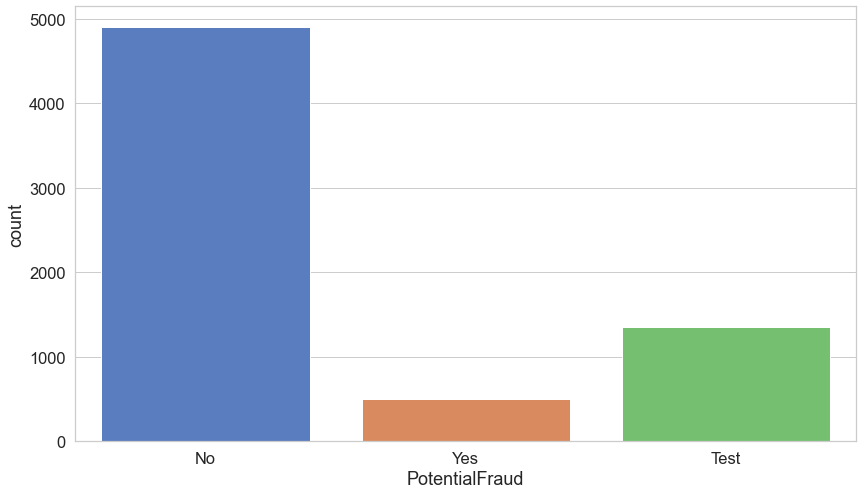

In [90]:
sns.countplot('PotentialFraud',data=cms_provider)

### Prepare Training & Test dataset 

In [91]:
cms_test = cms_patient_provider[cms_patient_provider['PotentialFraud'] == "Test"]

In [92]:
cms_test.shape

(115531, 75)

In [93]:
cms_train = cms_train[(cms_train['PotentialFraud'] == "Yes")| (cms_train['PotentialFraud'] == "No") ]

In [94]:
cms_test.head(3)

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
3  BENE11001  CLM392397   2009-06-02 2009-06-02  PRV55962   
4  BENE11001  CLM430760   2009-06-23 2009-06-23  PRV56112   
9  BENE11011  CLM347779   2009-05-08 2009-05-08  PRV51039   

   InscClaimAmtReimbursed  AttendingPhysician  OperatingPhysician  \
3                      30                   1                   0   
4                      30                   1                   0   
9                      60                   1                   0   

   OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
3               1         NaT                   NaN                0.0   
4               1         NaT                   NaN                0.0   
9               0         NaT                 45340                0.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
3         NaT                NaN              V5832              V5861   
4         NaT                NaN               9594              E9174   
9         NaT                NaN              V5832              42731   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
3               2724               3182              V5869              42731   
4               4019                NaN                NaN                NaN   
9              V5861                NaN                NaN                NaN   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
3                NaN                NaN                NaN   
4                NaN                NaN                NaN   
9                NaN                NaN                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   
9                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   
9                NaN                NaN                NaN                NaN   

   IsInpatient  AdmissionDuration  MismatchedAdmitCode         DOB  DOD  \
3            0                0.0                  NaN  1943-01-01  NaN   
4            0                0.0                  NaN  1943-01-01  NaN   
9            0                0.0                  NaN  1914-03-01  NaN   

   Gender  Race  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
3       1     1                      0     39     230                   12   
4       1     1                      0     39     230                   12   
9       0     2                      0      1     360                   12   

   NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
3                   12                      1                         0   
4                   12                      1                         0   
9                   12                      0                         1   

   ChronicCond_KidneyDisease  ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
3                          1                   0                           0   
4                          1                   0                           0   
9                          1                   0                           0   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
3                       1                     1                          1   
4                       1                     1                          1   
9                       1                     1                          0   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
3                         0                                1   
4                         0                                1 

In [95]:
cms_train = cms_train.replace({'PotentialFraud': 'Yes'}, 1)
cms_train = cms_train.replace({'PotentialFraud': 'No'}, 0)

In [96]:
# change columns types - remove later
cms_train['PotentialFraud'] = cms_train['PotentialFraud'].apply(pd.to_numeric)
#churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

### Find the corelation among features

In [97]:
cms_train_corr=cms_train.corr()
corr_mat = cms_train_corr['PotentialFraud']

print(corr_mat)


BeneID_count                       0.393531
ClaimID_count                      0.374197
AttendingPhysician                 0.374253
OperatingPhysician                 0.445086
OtherPhysician                     0.342673
IsInpatient                        0.525393
MismatchedAdmitCode                0.527762
Gender                             0.371661
RenalDiseaseIndicator              0.391002
ChronicCond_Alzheimer              0.380344
ChronicCond_Heartfailure           0.384131
ChronicCond_KidneyDisease          0.394239
ChronicCond_Cancer                 0.376945
ChronicCond_ObstrPulmonary         0.396191
ChronicCond_Depression             0.377411
ChronicCond_Diabetes               0.378881
ChronicCond_IschemicHeart          0.380093
ChronicCond_Osteoporasis           0.378274
ChronicCond_rheumatoidarthritis    0.380161
ChronicCond_stroke                 0.399206
IsDead                             0.317546
total_physicians                   0.377036
IsDiagnosisCode                 

In [98]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Multicollinrearity - Correlation matrix (it can be viewed in excel for better visibility)
cms_train_corr

BeneID_count  ClaimID_count  \
BeneID_count                         1.000000       0.942310   
ClaimID_count                        0.942310       1.000000   
AttendingPhysician                   0.942408       0.999998   
OperatingPhysician                   0.945147       0.980802   
OtherPhysician                       0.919084       0.985880   
IsInpatient                          0.391992       0.291212   
MismatchedAdmitCode                  0.391776       0.292106   
Gender                               0.938875       0.996645   
RenalDiseaseIndicator                0.937977       0.990210   
ChronicCond_Alzheimer                0.940093       0.996537   
ChronicCond_Heartfailure             0.943607       0.998209   
ChronicCond_KidneyDisease            0.943130       0.995618   
ChronicCond_Cancer                   0.932622       0.989367   
ChronicCond_ObstrPulmonary           0.943219       0.992981   
ChronicCond_Depression               0.940557       0.997379   
ChronicCond_Diabetes                 0.942774       0.999205   
ChronicCond_IschemicHeart            0.944001       0.999295   
ChronicCond_Osteoporasis             0.940864       0.995759   
ChronicCond_rheumatoidarthritis      0.938983       0.995734   
ChronicCond_stroke                   0.925933       0.977086   
IsDead                               0.799272       0.838367   
total_physicians                     0.941761       0.999216   
IsDiagnosisCode                      0.391992       0.291212   
IsDeductibleAmtPaid                  0.693542       0.636673   
N_Procedure                          0.397056       0.298544   
N_UniqueDiagnosis_Claims             0.949151       0.985763   
Age_Under_65                         0.926223       0.981023   
Age_65_upto_75                       0.938259       0.995554   
Age_75_upto_85                       0.938945       0.994662   
Age_85_or_Over                       0.924087       0.985884   
Race_1                               0.943377       0.995990   
Race_2                               0.838276       0.848468   
Race_3                               0.608574       0.723671   
Race_5                               0.638130       0.737550   
InscClaimAmtReimbursed              -0.074619      -0.080840   
DeductibleAmtPaid                   -0.085388      -0.094238   
AdmissionDuration                   -0.079918      -0.086871   
IPAnnualReimbursementAmt            -0.051172      -0.057317   
IPAnnualDeductibleAmt               -0.052975      -0.059711   
OPAnnualReimbursementAmt             0.023006       0.022967   
OPAnnualDeductibleAmt                0.021328       0.022682   
NoOfMonths_PartACov                  0.047807       0.038973   
NoOfMonths_PartBCov                  0.048351       0.039140   
PotentialFraud                       0.393531       0.374197   

                                 AttendingPhysician  OperatingPhysician  \
BeneID_count                               0.942408            0.945147   
ClaimID_count                              0.999998            0.980802   
AttendingPhysician                         1.000000            0.980798   
OperatingPhysician                         0.980798            1.000000   
OtherPhysician                             0.985908            0.955594   
IsInpatient                                0.291201            0.456422   
MismatchedAdmitCode                        0.292094            0.457159   
Gender                                     0.996643            0.977898   
RenalDiseaseIndicator                      0.990204            0.978025   
ChronicCond_Alzheimer                      0.996532            0.980612   
ChronicCond_Heartfailure                   0.998209            0.983063   
ChronicCond_KidneyDisease                  0.995623            0.985018   
ChronicCond_Cancer                         0.989362            0.974169   
ChronicCond_ObstrPulmonary                 0.992982            0.984018   
ChronicCond_Depression     

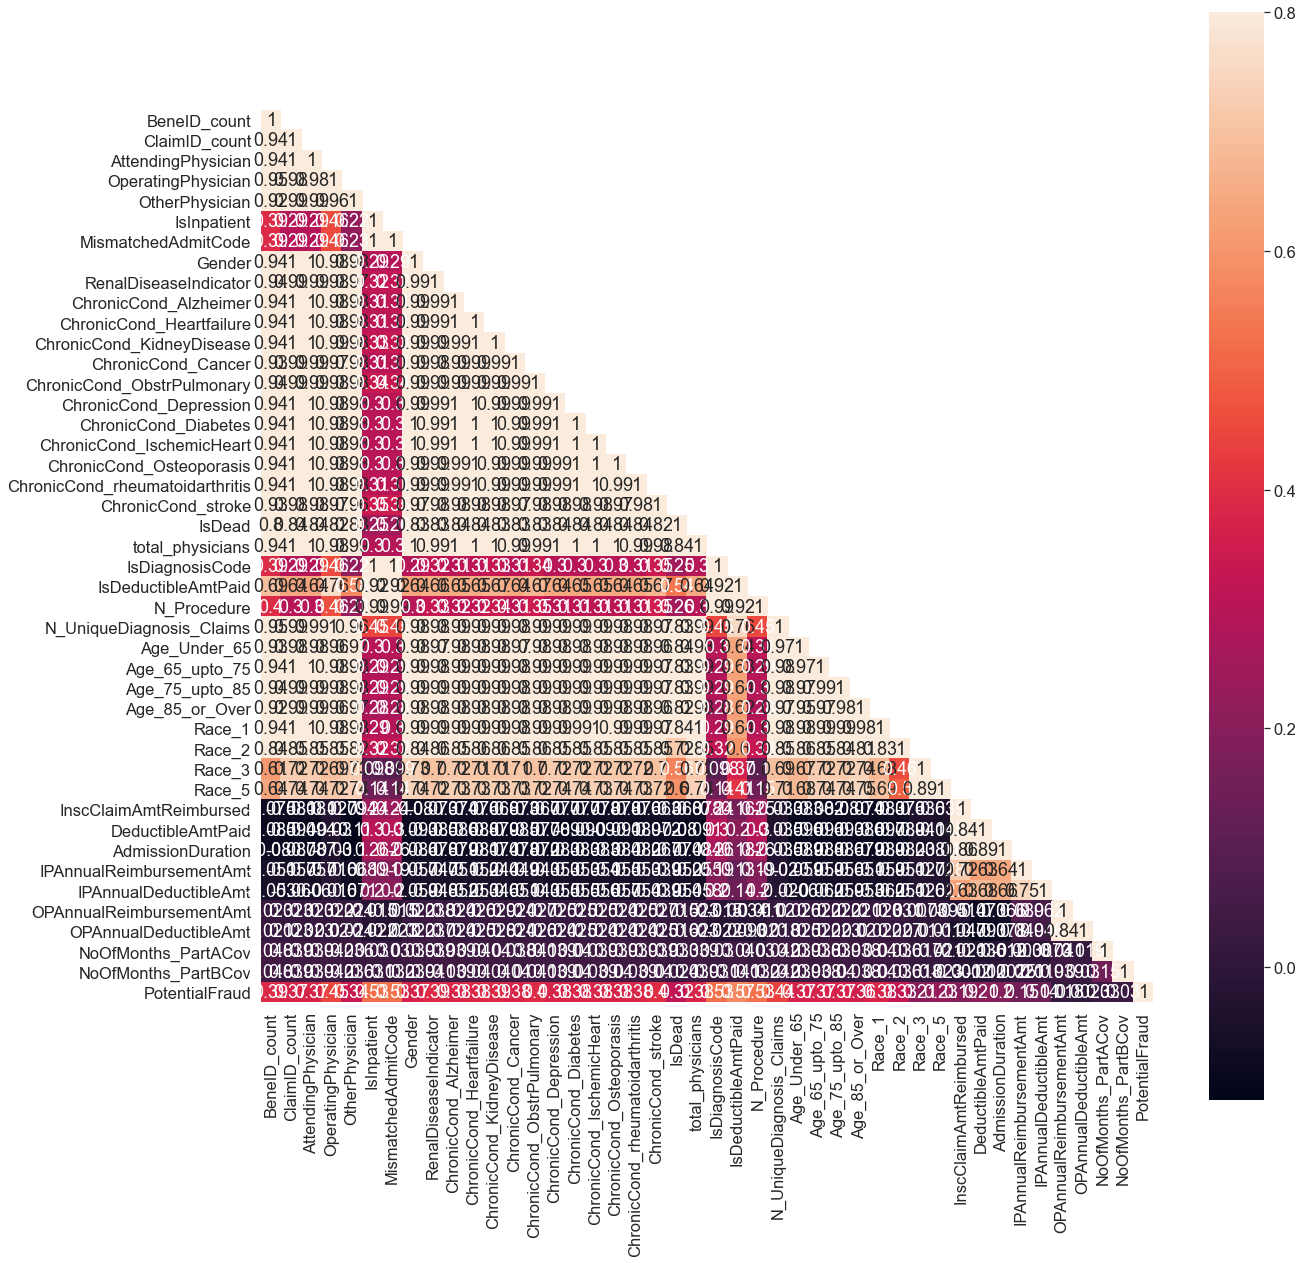

In [99]:
# heatmap - not much readability but showing multicolliearity which will be treated with PCA
mask = np.array(cms_train_corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(cms_train_corr, mask=mask,vmax=.8, square=True,annot=True)

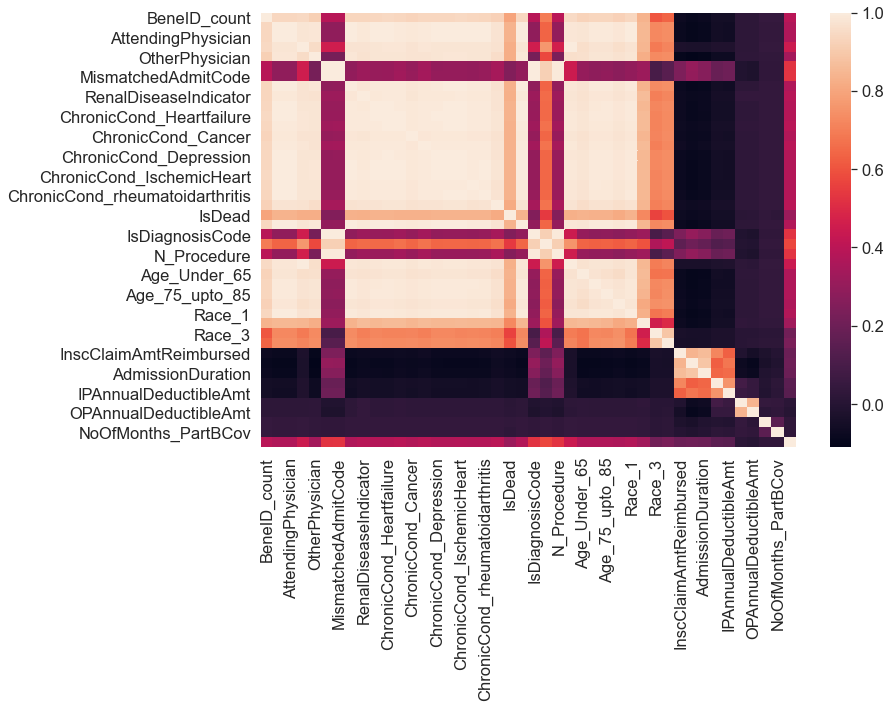

In [100]:
plt.figure(figsize=(12,8))
#fraud_corr=cms_train_corr['PotentialFraud']
sns.heatmap(cms_train_corr)

## Training data - EDA on final data which will be used to train the Model
 - Bi Variate analysis will be added

 https://github.com/rohansoni634/Healthcare-Provider-Fraud-Detection-Analysis/blob/master/Healthcare%20Provider%20Fraud%20Detection%20Analysis_EDA_First_cut_Models.ipynb


Good EDA & explanation
https://nycdatascience.com/blog/student-works/certainty-and-healthcare-fraud/

github
https://github.com/datatodavid/FraudDetection/blob/main/Health%20Fraud%20-%20III.%20Machine%20Learning%20-%20Upsampled%20Balanced%20Version.ipynb

In [101]:
cms_train.columns
#cms_train["AttendingPhysician"]

Index(['Provider', 'BeneID_count', 'ClaimID_count', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'IsInpatient',
       'MismatchedAdmitCode', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IsDead', 'total_physicians', 'IsDiagnosisCode',
       'IsDeductibleAmtPaid', 'N_Procedure', 'N_UniqueDiagnosis_Claims',
       'Age_Under_65', 'Age_65_upto_75', 'Age_75_upto_85', 'Age_85_or_Over',
       'Race_1', 'Race_2', 'Race_3', 'Race_5', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'AdmissionDuration', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'NoOfMonths_PartAC

### Final check for training data - no categorical column

In [102]:

# store columns with specific data type
numeric_columns = cms_train.select_dtypes(include=['integer', 'float64', 'uint8']).columns

categorical_columns = cms_train.select_dtypes(include=['object']).columns

print("numeric_columns: ", numeric_columns)
print("categorical_columns :", categorical_columns)

numeric_columns:  Index(['BeneID_count', 'ClaimID_count', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'IsInpatient',
       'MismatchedAdmitCode', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IsDead', 'total_physicians', 'IsDiagnosisCode',
       'IsDeductibleAmtPaid', 'N_Procedure', 'N_UniqueDiagnosis_Claims',
       'Age_Under_65', 'Age_65_upto_75', 'Age_75_upto_85', 'Age_85_or_Over',
       'Race_1', 'Race_2', 'Race_3', 'Race_5', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'AdmissionDuration', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'NoOfMonths_

### Remove the ID columns from training data

In [103]:
#cms_train.drop(categorical_columns, axis =1, inplace= True)
provider_train = list(cms_train.set_index('Provider').index)
provider_test = list(cms_test.set_index('Provider').index)


In [104]:
#provider_train
cms_train=cms_train.set_index('Provider')

In [105]:
cms_train.head(3)

BeneID_count  ClaimID_count  AttendingPhysician  OperatingPhysician  \
Provider                                                                        
PRV51001            24             25                  25                   5   
PRV51003           117            132                 132                  45   
PRV51004           138            149                 149                  27   

          OtherPhysician  IsInpatient  MismatchedAdmitCode  Gender  \
Provider                                                             
PRV51001              10            5                  5.0       9   
PRV51003              25           62                 52.0      54   
PRV51004              63            0                  0.0      46   

          RenalDiseaseIndicator  ChronicCond_Alzheimer  \
Provider                                                 
PRV51001                      8                     15   
PRV51003                     29                     56   
PRV51004                     23                     64   

          ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
Provider                                                        
PRV51001                        19                         17   
PRV51003                        80                         64   
PRV51004                        88                         50   

          ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
Provider                                                   
PRV51001                   5                          10   
PRV51003                  10                          41   
PRV51004                  16                          41   

          ChronicCond_Depression  ChronicCond_Diabetes  \
Provider                                                 
PRV51001                       9                    21   
PRV51003                      54                   100   
PRV51004                      63                   105   

          ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
Provider                                                        
PRV51001                         23                         6   
PRV51003                        112                        33   
PRV51004                        108                        49   

          ChronicCond_rheumatoidarthritis  ChronicCond_stroke  IsDead  \
Provider                                                                
PRV51001                                8                   6     0.0   
PRV51003                               38                  12     1.0   
PRV51004                               46                  17     1.0   

          total_physicians  IsDiagnosisCode  IsDeductibleAmtPaid  N_Procedure  \
Provider                                                                        
PRV51001                40                5                    5            3   
PRV51003               202               62                   63           48   
PRV51004               239                0                    7            0   

          N_UniqueDiagnosis_Claims  Age_Under_65  Age_65_upto_75  \
Provider                                                           
PRV51001                        91             3               7   
PRV51003                       761            37              41   
PRV51004                       410            30              62   

          Age_75_upto_85  Age_85_or_Over  Race_1  Race_2  Race_3  Race_5  \
Provider                                                                   
PRV51001               8               7    21.0     4.0     0.0     0.0   
PRV51003              41              13   107.0    24.0     0.0     1.0   
PRV51004              35              22   120.0    24.0     5.0     0.0   

          InscClaimAmtReimbursed  DeductibleAmtPaid  AdmissionDuration  \
Provider                                                                 
PRV51001                  4186.0              214.0                1.0   
PR

### Final check for training data - no missing column

In [106]:
#missing_columns = cms_train_inpatient.columns[100*(cms_train_inpatient.isnull().sum()/len(cms_train_inpatient.index)) > 80]
missing_columns = cms_train.columns[(cms_train.isnull().sum()) > 0]
print("missing_columns in inpatient data :", missing_columns) 

missing_columns in inpatient data : Index([], dtype='object')


### Srandardization

In [107]:
cms_train.columns

Index(['BeneID_count', 'ClaimID_count', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'IsInpatient',
       'MismatchedAdmitCode', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IsDead', 'total_physicians', 'IsDiagnosisCode',
       'IsDeductibleAmtPaid', 'N_Procedure', 'N_UniqueDiagnosis_Claims',
       'Age_Under_65', 'Age_65_upto_75', 'Age_75_upto_85', 'Age_85_or_Over',
       'Race_1', 'Race_2', 'Race_3', 'Race_5', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'AdmissionDuration', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'NoOfMonths_PartACov', 'NoOfMo

### Prepare Train & Test data for model validation

In [108]:
 #Preparing X dataset for training
X = cms_train.drop(['PotentialFraud'],axis=1)

#Putting response variable to y
y = cms_train['PotentialFraud']


### BUILD THE MODEL

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [110]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3786, 43)
(1623, 43)
(3786,)
(1623,)


In [229]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


### **MODEL BUILDING**

#### Recursive Feature Elimination (RFE) for Feature Selection in Python

In [111]:

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from six import StringIO 
# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE




In [112]:
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False  True  True False  True  True  True  True  True  True  True
 False False False  True False False False  True  True False False  True
  True False False False False False False  True  True  True False False
  True False False False False  True  True]
[ 4  6  1  1 19  1  1  1  1  1  1  1  7 10 13  1 16  3  2  1  1 15  5  1
  1  8 11 17 14  9 18  1  1  1 23 12  1 24 22 21 20  1  1]


In [113]:
# Variables selected by RFE 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('BeneID_count', False, 4),
 ('ClaimID_count', False, 6),
 ('AttendingPhysician', True, 1),
 ('OperatingPhysician', True, 1),
 ('OtherPhysician', False, 19),
 ('IsInpatient', True, 1),
 ('MismatchedAdmitCode', True, 1),
 ('Gender', True, 1),
 ('RenalDiseaseIndicator', True, 1),
 ('ChronicCond_Alzheimer', True, 1),
 ('ChronicCond_Heartfailure', True, 1),
 ('ChronicCond_KidneyDisease', True, 1),
 ('ChronicCond_Cancer', False, 7),
 ('ChronicCond_ObstrPulmonary', False, 10),
 ('ChronicCond_Depression', False, 13),
 ('ChronicCond_Diabetes', True, 1),
 ('ChronicCond_IschemicHeart', False, 16),
 ('ChronicCond_Osteoporasis', False, 3),
 ('ChronicCond_rheumatoidarthritis', False, 2),
 ('ChronicCond_stroke', True, 1),
 ('IsDead', True, 1),
 ('total_physicians', False, 15),
 ('IsDiagnosisCode', False, 5),
 ('IsDeductibleAmtPaid', True, 1),
 ('N_Procedure', True, 1),
 ('N_UniqueDiagnosis_Claims', False, 8),
 ('Age_Under_65', False, 11),
 ('Age_65_upto_75', False, 17),
 ('Age_75_upto_85', False, 1

### Recursive Feature Elimination (RFE) for Feature Selection in Python - Final feature list selected by RFE

In [114]:
col = X_train.columns[rfe.support_]
col

Index(['AttendingPhysician', 'OperatingPhysician', 'IsInpatient',
       'MismatchedAdmitCode', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Diabetes',
       'ChronicCond_stroke', 'IsDead', 'IsDeductibleAmtPaid', 'N_Procedure',
       'Race_2', 'Race_3', 'Race_5', 'AdmissionDuration',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov'],
      dtype='object')

In [115]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[col], y_train)
#logsk.fit(X, y)

LogisticRegression(C=1000000000.0)

### Model Evaluation 

In [116]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_0 = y_pred_df.iloc[:,[0]]
# Let's see the head
print(y_pred_df.head())
print(y_pred_1.head())


          0         1
0  0.958451  0.041549
1  0.981223  0.018777
2  0.981391  0.018609
3  0.970608  0.029392
4  0.976408  0.023592
          1
0  0.041549
1  0.018777
2  0.018609
3  0.029392
4  0.023592


In [117]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
print(y_test_df.head())
print(y_test_df.info())

          PotentialFraud
Provider                
PRV52094               0
PRV57716               0
PRV54040               0
PRV53933               0
PRV51967               0
<class 'pandas.core.frame.DataFrame'>
Index: 1623 entries, PRV52094 to PRV57652
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PotentialFraud  1623 non-null   int64
dtypes: int64(1)
memory usage: 25.4+ KB
None


In [118]:
# Putting CustID to index
#print(y_test_df.index)
y_test_df['ProvID'] = y_test_df.index
print(y_test_df)
# Removing index for both dataframes to append them side by side 


          PotentialFraud    ProvID
Provider                          
PRV52094               0  PRV52094
PRV57716               0  PRV57716
PRV54040               0  PRV54040
PRV53933               0  PRV53933
PRV51967               0  PRV51967
PRV56055               0  PRV56055
PRV56930               0  PRV56930
PRV52998               0  PRV52998
PRV55276               0  PRV55276
PRV53799               0  PRV53799
PRV57143               0  PRV57143
PRV54050               0  PRV54050
PRV53680               0  PRV53680
PRV53377               0  PRV53377
PRV51521               0  PRV51521
PRV51344               0  PRV51344
PRV56638               0  PRV56638
PRV52837               0  PRV52837
PRV53203               0  PRV53203
PRV54362               0  PRV54362
PRV54355               0  PRV54355
PRV51025               0  PRV51025
PRV54832               1  PRV54832
PRV51669               0  PRV51669
PRV56614               0  PRV56614
PRV51342               0  PRV51342
PRV53593            

In [119]:

#y_pred_1.reset_index(drop=True, inplace=True)
#y_test_df.reset_index(drop=True, inplace=True)
#y_test_df.reset_index(inplace = True)

y_pred_1.reset_index(inplace=True)
y_test_df.reset_index(inplace=True)

print(y_pred_1.head())
print(y_test_df.head())

   index         1
0      0  0.041549
1      1  0.018777
2      2  0.018609
3      3  0.029392
4      4  0.023592
   Provider  PotentialFraud    ProvID
0  PRV52094               0  PRV52094
1  PRV57716               0  PRV57716
2  PRV54040               0  PRV54040
3  PRV53933               0  PRV53933
4  PRV51967               0  PRV51967


In [120]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
print(y_pred_1.head())
print(y_test_df.head())
print(y_pred_final.head())




   index         1
0      0  0.041549
1      1  0.018777
2      2  0.018609
3      3  0.029392
4      4  0.023592
   Provider  PotentialFraud    ProvID
0  PRV52094               0  PRV52094
1  PRV57716               0  PRV57716
2  PRV54040               0  PRV54040
3  PRV53933               0  PRV53933
4  PRV51967               0  PRV51967
   Provider  PotentialFraud    ProvID  index         1
0  PRV52094               0  PRV52094      0  0.041549
1  PRV57716               0  PRV57716      1  0.018777
2  PRV54040               0  PRV54040      2  0.018609
3  PRV53933               0  PRV53933      3  0.029392
4  PRV51967               0  PRV51967      4  0.023592


In [121]:

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Fraud_Prob'})
print(y_pred_1.head())
print(y_test_df.head())
print(y_pred_final.head())

   index         1
0      0  0.041549
1      1  0.018777
2      2  0.018609
3      3  0.029392
4      4  0.023592
   Provider  PotentialFraud    ProvID
0  PRV52094               0  PRV52094
1  PRV57716               0  PRV57716
2  PRV54040               0  PRV54040
3  PRV53933               0  PRV53933
4  PRV51967               0  PRV51967
   Provider  PotentialFraud    ProvID  index  Fraud_Prob
0  PRV52094               0  PRV52094      0    0.041549
1  PRV57716               0  PRV57716      1    0.018777
2  PRV54040               0  PRV54040      2    0.018609
3  PRV53933               0  PRV53933      3    0.029392
4  PRV51967               0  PRV51967      4    0.023592


In [122]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ProvID','PotentialFraud','Fraud_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head(100)
print(y_pred_1.head())
print(y_test_df.head())
print(y_pred_final.head())

   index         1
0      0  0.041549
1      1  0.018777
2      2  0.018609
3      3  0.029392
4      4  0.023592
   Provider  PotentialFraud    ProvID
0  PRV52094               0  PRV52094
1  PRV57716               0  PRV57716
2  PRV54040               0  PRV54040
3  PRV53933               0  PRV53933
4  PRV51967               0  PRV51967
     ProvID  PotentialFraud  Fraud_Prob
0  PRV52094               0    0.041549
1  PRV57716               0    0.018777
2  PRV54040               0    0.018609
3  PRV53933               0    0.029392
4  PRV51967               0    0.023592


In [123]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

ProvID  PotentialFraud  Fraud_Prob  predicted
0  PRV52094               0    0.041549          0
1  PRV57716               0    0.018777          0
2  PRV54040               0    0.018609          0
3  PRV53933               0    0.029392          0
4  PRV51967               0    0.023592          0

In [124]:
from sklearn import metrics

### Confusion matrix 

In [125]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.PotentialFraud, y_pred_final.predicted )
confusion

array([[1443,   24],
       [  87,   69]], dtype=int64)

In [126]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.PotentialFraud, y_pred_final.predicted)

0.9316081330868762

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

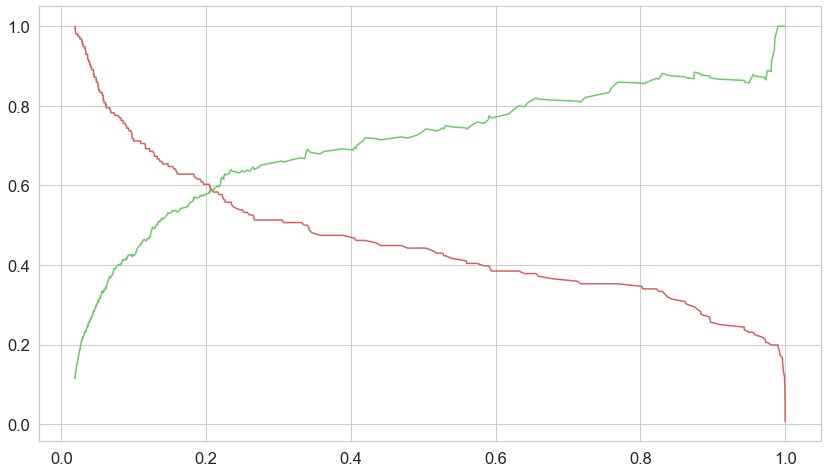

In [128]:
#Precision - Recall trade off  for cut off -> 0.5
from sklearn.metrics import precision_recall_curve

y_pred_final.PotentialFraud, y_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_pred_final.PotentialFraud, y_pred_final.Fraud_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


### ROC Curve

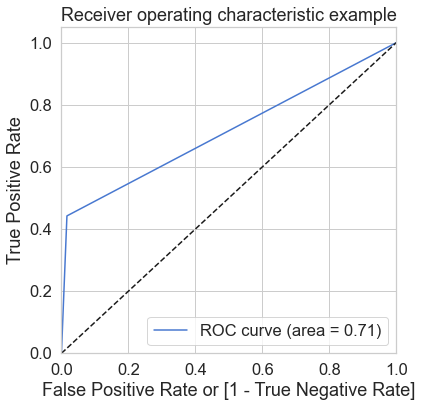

(array([0.        , 0.01635992, 1.        ]),
 array([0.        , 0.44230769, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [129]:
# ROC Curve  for cut off -> 0.5
draw_roc(y_pred_final.PotentialFraud, y_pred_final.predicted)

In [130]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.PotentialFraud, y_pred_final.Fraud_Prob))

'0.91'

## Metrics beyond simply accuracy

In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4423076923076923

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.983640081799591

In [134]:
# Calculate false postive rate - predicting Fraud when provider is not fraud
print(FP/ float(TN+FP))

0.016359918200409


In [135]:
# positive predictive value 
print (TP / float(TP+FP))

0.7419354838709677


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9431372549019608


In [137]:
print(classification_report(y_pred_final.PotentialFraud, y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1467
           1       0.74      0.44      0.55       156

    accuracy                           0.93      1623
   macro avg       0.84      0.71      0.76      1623
weighted avg       0.92      0.93      0.92      1623



### Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity



In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

ProvID  PotentialFraud  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  \
0  PRV52094               0    0.041549          0    1    0    0    0    0   
1  PRV57716               0    0.018777          0    1    0    0    0    0   
2  PRV54040               0    0.018609          0    1    0    0    0    0   
3  PRV53933               0    0.029392          0    1    0    0    0    0   
4  PRV51967               0    0.023592          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [139]:
#y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob_cutoff','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.PotentialFraud, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob_cutoff  accuracy  sensitivity  specificity
0.0          0.0  0.096118     1.000000     0.000000
0.1          0.1  0.879852     0.711538     0.897751
0.2          0.2  0.919901     0.602564     0.953647
0.3          0.3  0.927911     0.512821     0.972052
0.4          0.4  0.928527     0.467949     0.977505
0.5          0.5  0.931608     0.442308     0.983640
0.6          0.6  0.930376     0.384615     0.988412
0.7          0.7  0.930376     0.358974     0.991138
0.8          0.8  0.931608     0.346154     0.993865
0.9          0.9  0.924214     0.250000     0.995910


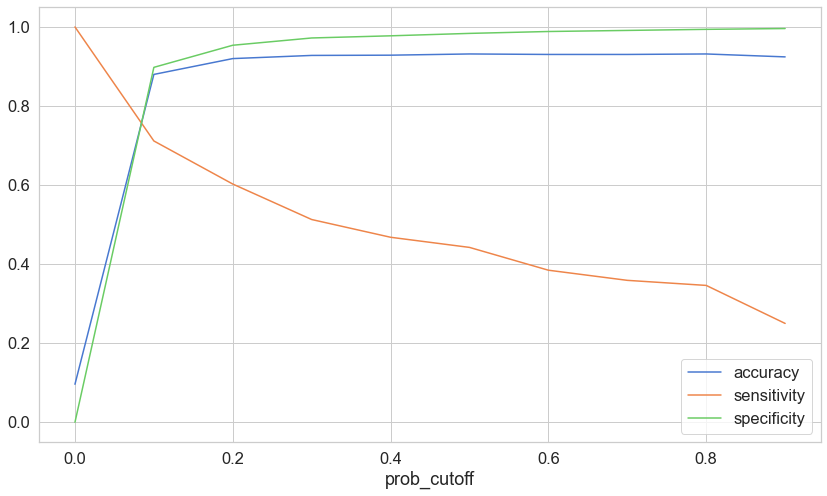

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities. 
#accuracy & specificity are proportional but sensitivity is inversely proportionalto accuracy. 
#Hence focus is to get an optimized accuracy & 
#sensitivity (detects how accurately system predicts the True Frud cases)

cutoff_df.plot.line(x='prob_cutoff', y=['accuracy','sensitivity','specificity'])
plt.show()

#### Let's take optimized cutoff value 0.5 and recalculate the final Accuracy & Sensitivity

In [142]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

ProvID  PotentialFraud  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  \
0  PRV52094               0    0.041549          0    1    0    0    0    0   
1  PRV57716               0    0.018777          0    1    0    0    0    0   
2  PRV54040               0    0.018609          0    1    0    0    0    0   
3  PRV53933               0    0.029392          0    1    0    0    0    0   
4  PRV51967               0    0.023592          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

### set cut off 0.3

In [143]:
y_pred_final['predicted'] = y_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [144]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.PotentialFraud, y_pred_final.predicted )
confusion

array([[1426,   41],
       [  76,   80]], dtype=int64)

In [145]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.PotentialFraud, y_pred_final.predicted)

0.9279112754158965

In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5128205128205128

In [148]:
# Let us calculate specificity
print(TN / float(TN+FP))

# Calculate false postive rate - predicting Fraud when provider is not fraud
print(FP/ float(TN+FP))

# positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.9720518064076347
0.02794819359236537
0.6611570247933884
0.9494007989347537


In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
precision_score(y_pred_final.PotentialFraud, y_pred_final.predicted)

0.6611570247933884

In [151]:
recall_score(y_pred_final.PotentialFraud, y_pred_final.predicted)

0.5128205128205128

In [152]:
from sklearn.metrics import precision_recall_curve

y_pred_final.PotentialFraud, y_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_pred_final.PotentialFraud, y_pred_final.Fraud_Prob)


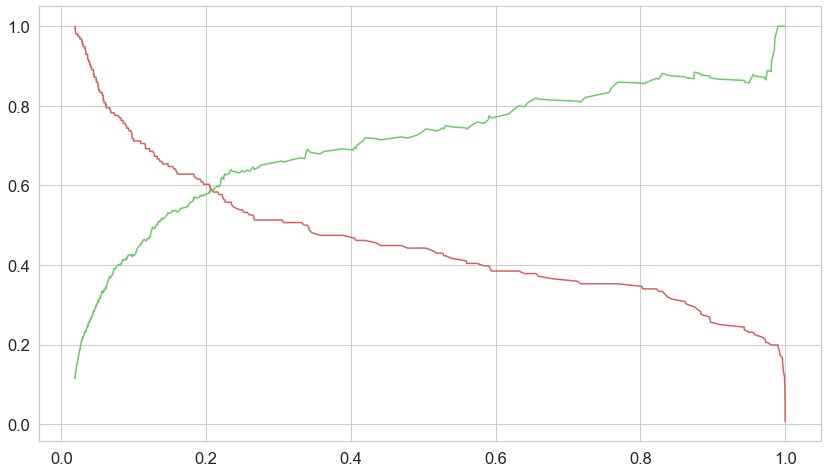

In [153]:
#Precision - Recall trade off  for cut off -> 0.3
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

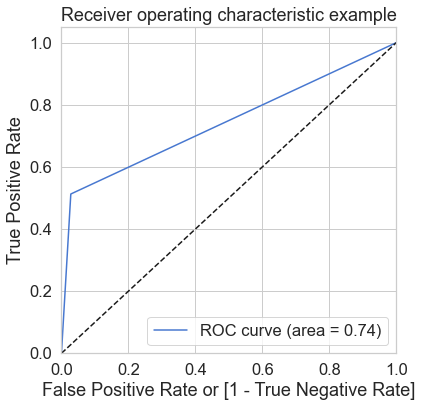

(array([0.        , 0.02794819, 1.        ]),
 array([0.        , 0.51282051, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [154]:
#ROC with cut off -> 0,3
draw_roc(y_pred_final.PotentialFraud, y_pred_final.predicted)

In [155]:
#Classification report with cut off 0.3
print(classification_report(y_pred_final.PotentialFraud, y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1467
           1       0.66      0.51      0.58       156

    accuracy                           0.93      1623
   macro avg       0.81      0.74      0.77      1623
weighted avg       0.92      0.93      0.92      1623



Basic Logistic Regression wirg RFE is giving low accuracy. Lets review the data streagy and data preprocessing and derive new set of features. Also we will try other models like -Random Forest , XGBOOST

### Making Predictions on Test Data

In [156]:
print(cms_test.shape)
print(cms_test.columns)

# store columns with specific data type
numeric_columns = cms_test.select_dtypes(include=['integer', 'float64', 'uint8']).columns

categorical_columns = cms_test.select_dtypes(include=['object']).columns

print("numeric_columns: ", numeric_columns)
print("categorical_columns :", categorical_columns)

(115531, 75)
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'IsInpatient', 'AdmissionDuration',
       'MismatchedAdmitCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Canc

In [157]:
X_pred = X_test[col]
#res = modres.predict(X_test[col])

In [158]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_pred)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

1
0  0.041549
1  0.018777
2  0.018609
3  0.029392
4  0.023592

In [159]:
y_train[:10]

Provider
PRV55591    0
PRV54829    0
PRV55302    0
PRV52673    0
PRV52981    0
PRV52558    0
PRV54089    0
PRV56685    1
PRV57132    0
PRV52001    0
Name: PotentialFraud, dtype: int64

## Explain Model Prediction with SHAP (Shapeley Values)

In [160]:
def model_fraud_proba(x):
    return logsk.predict_proba(x)[:,1]

def model_fraud_log_odds(x):
    p = logsk.predict_log_proba(x)
    return p[:,1] - p[:,0]

In [161]:
!pip install shap
import shap

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [162]:
#X_pred.columns
X_train[col].columns

Index(['AttendingPhysician', 'OperatingPhysician', 'IsInpatient',
       'MismatchedAdmitCode', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Diabetes',
       'ChronicCond_stroke', 'IsDead', 'IsDeductibleAmtPaid', 'N_Procedure',
       'Race_2', 'Race_3', 'Race_5', 'AdmissionDuration',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov'],
      dtype='object')

In [163]:
# compute the SHAP values for the linear model
background_fraud = shap.maskers.Independent(X_train[col], max_samples=100)
explainer = shap.Explainer(model_fraud_proba, background_fraud)


In [164]:
shap_values_fraud = explainer(X_train[col][:10000])

Permutation explainer: 3787it [03:23, 18.65it/s]                                                                       


In [165]:
print(shap_values_fraud)



.values =
array([[-6.99797913e-02,  1.57233736e-02, -6.03236518e-03, ...,
        -1.07255221e-02, -1.39004232e-04, -1.60321867e-04],
       [-2.31119642e-02,  1.29604280e-02, -7.75190134e-03, ...,
        -1.40254284e-02, -2.29832391e-04, -3.13638687e-04],
       [-8.61514454e-02,  1.94553688e-02, -1.01274884e-02, ...,
        -1.19667285e-02, -2.17133192e-04, -2.93707956e-04],
       ...,
       [-7.37952252e-02,  2.15940328e-02, -7.95101458e-03, ...,
        -1.12222596e-02, -8.45399046e-05,  5.98997090e-03],
       [-1.06205486e-01,  2.58724074e-02, -7.92938323e-03, ...,
         1.59027924e-03, -2.17328747e-04, -3.10269350e-04],
       [-6.21718568e-02,  1.78460876e-02, -8.87414658e-03, ...,
        -8.98108440e-03, -1.97441377e-04, -2.53269465e-04]])

.base_values =
array([0.08862901, 0.08862901, 0.08862901, ..., 0.08862901, 0.08862901,
       0.08862901])

.data =
array([[ 1.,  0.,  0., ...,  0., 12., 12.],
       [75., 12.,  0., ...,  0., 12., 12.],
       [ 1.,  0.,  0., ..., 

### Global bar plot

Passing a matrix of SHAP values to the bar plot function creates a global feature importance plot, where the global importance of each feature is taken to be the mean absolute value for that feature over all the given samples.

By default the bar plot only shows a maximum of ten bars, but this can be controlled with the max_display parameter:

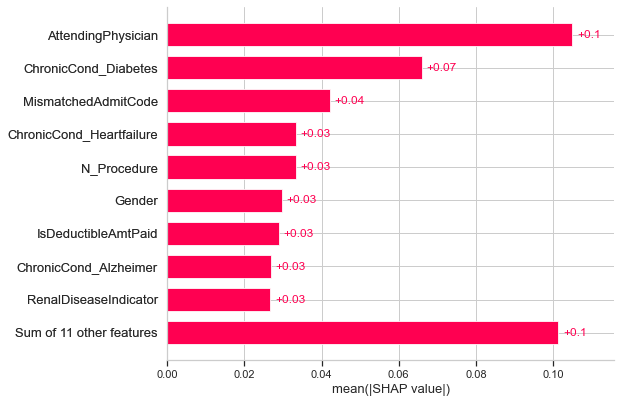

In [166]:
shap.plots.bar(shap_values_fraud)

### Local bar plot
Passing a row of SHAP values to the bar plot function creates a local feature importance plot, where the bars are the SHAP values for each feature. Note that the feature values are show in gray to the left of the feature names.

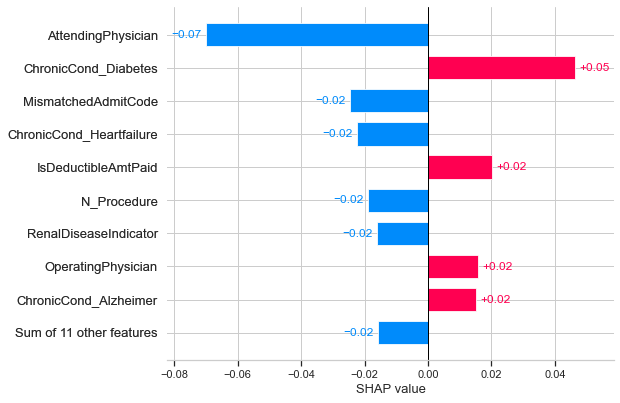

In [167]:
shap.plots.bar(shap_values_fraud[0])

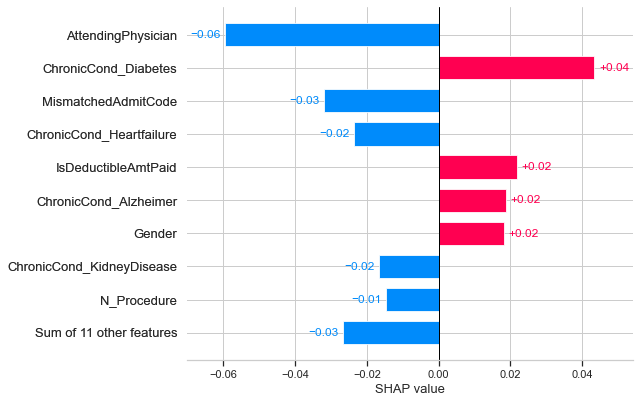

In [168]:
shap.plots.bar(shap_values_fraud[3000])

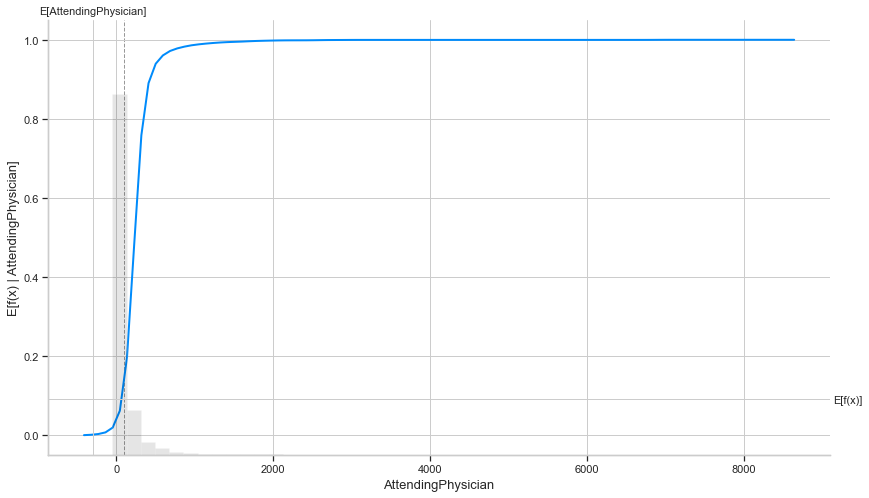

In [169]:
# make a standard partial dependence plot
sample_ind = 20
fig,ax = shap.partial_dependence_plot(
    "AttendingPhysician", model_fraud_proba, X_train[col], model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

### https://machinelearningmastery.com/rfe-feature-selection-in-python/

https://towardsdatascience.com/shap-how-to-interpret-machine-learning-models-with-python-2323f5af4be9

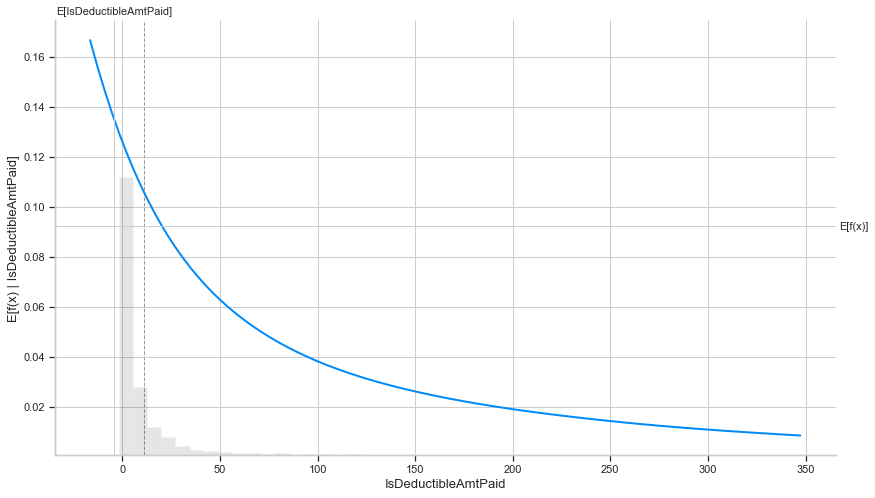

In [170]:
# make a standard partial dependence plot
sample_ind = 20
fig,ax = shap.partial_dependence_plot(
    "IsDeductibleAmtPaid", model_fraud_proba, X_train[col], model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [171]:
X_train.shape

(3786, 43)

In [172]:
# compute the SHAP values for the linear model 
explainer_log_odds = shap.Explainer(model_fraud_log_odds, background_fraud)
shap_values_fraud_log_odds = explainer_log_odds(X_train[col][:1000])


Permutation explainer: 1001it [00:53, 18.58it/s]                                                                       


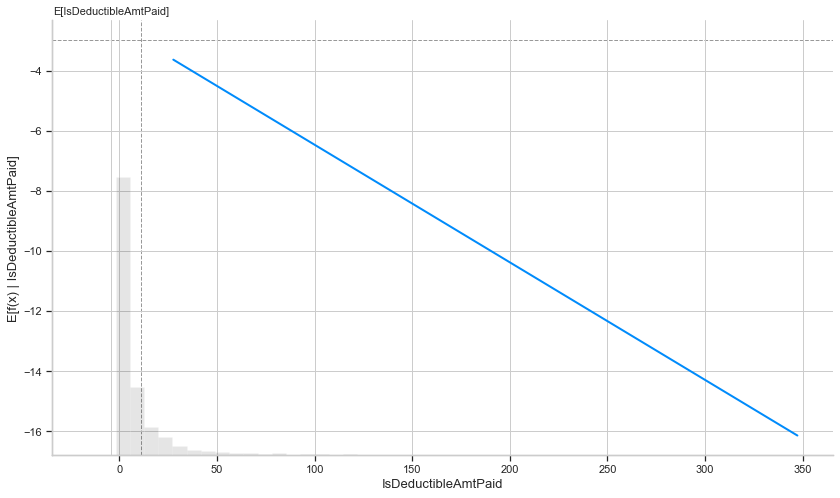

In [173]:
# make a standard partial dependence plot
sample_ind = 20
fig,ax = shap.partial_dependence_plot(
    "IsDeductibleAmtPaid", model_fraud_log_odds, X_train[col], model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)


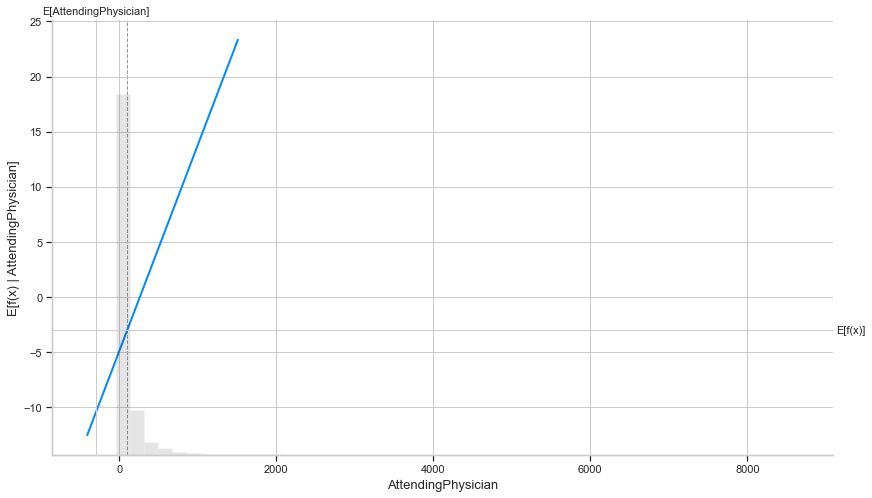

In [174]:
# make a standard partial dependence plot
sample_ind = 20
fig,ax = shap.partial_dependence_plot(
    "AttendingPhysician", model_fraud_log_odds, X_train[col], model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)


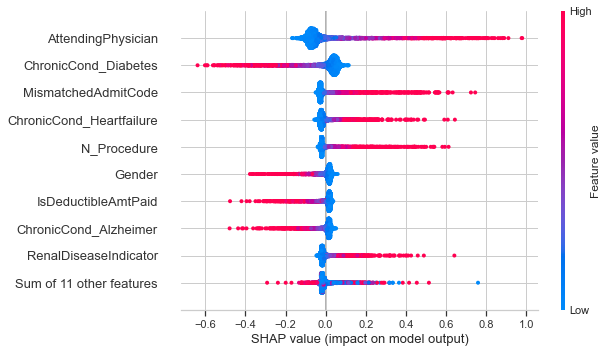

In [175]:
shap.plots.beeswarm(shap_values_fraud)

In [176]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_fraud[10])

In [177]:
#shap.initjs()
shap.plots.force(shap_values_fraud[200])

In [178]:
X_train.columns

Index(['BeneID_count', 'ClaimID_count', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'IsInpatient',
       'MismatchedAdmitCode', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IsDead', 'total_physicians', 'IsDiagnosisCode',
       'IsDeductibleAmtPaid', 'N_Procedure', 'N_UniqueDiagnosis_Claims',
       'Age_Under_65', 'Age_65_upto_75', 'Age_75_upto_85', 'Age_85_or_Over',
       'Race_1', 'Race_2', 'Race_3', 'Race_5', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'AdmissionDuration', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'NoOfMonths_PartACov', 'NoOfMo

## Explaining a XGBOOST MODEL

In [179]:
# train XGBoost model
import xgboost

# train XGBoost model
#model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_train[col], y_train)

#added RFE with XGBOOST
# Recursive feature elimination

from sklearn.feature_selection import RFE
model = xgboost.XGBClassifier()
rfe = RFE(model,20)
rfe = rfe.fit(X_train, y_train)


[13:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [180]:
#added RFE with XGBOOST and selecting features

print(rfe.support_)
print(rfe.ranking_)

col = X_train.columns[rfe.support_]
print(col)


[ True False False  True  True  True  True False  True False False False
 False  True  True False False  True  True  True False False False  True
  True False False False  True  True False False False False  True  True
 False  True  True  True False False False]
[ 1 22 13  1  1  1  1  3  1  7 20 11 19  1  1 18 21  1  1  1 10 14 24  1
  1 15  8  4  1  1 23 12  2  6  1  1 17  1  1  1  5  9 16]
Index(['BeneID_count', 'OperatingPhysician', 'OtherPhysician', 'IsInpatient',
       'MismatchedAdmitCode', 'RenalDiseaseIndicator',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IsDeductibleAmtPaid', 'N_Procedure',
       'Age_75_upto_85', 'Age_85_or_Over', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt'],
      dtype='object')


In [181]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [182]:
# now train XGBoost model with selected columns
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_train[col], y_train)


[13:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [183]:

# Get our predictions
xgb_predictions = model.predict(X_test[col])

In [184]:
xgb_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
xgb_predictions_prob = model.predict_proba(X_test[col])
xgb_predictions_prob

array([[6.8054575e-01, 3.1945425e-01],
       [9.9736762e-01, 2.6323700e-03],
       [9.9940443e-01, 5.9555861e-04],
       ...,
       [9.6313727e-01, 3.6862735e-02],
       [9.9619848e-01, 3.8015279e-03],
       [9.9769741e-01, 2.3026140e-03]], dtype=float32)

### XGBOOST Model Evaluation

In [186]:
accuracy_score(y_test, xgb_predictions)

0.9316081330868762

In [187]:
# Predicted probabilities
y_pred_xgb = model.predict(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df_xgb = pd.DataFrame(y_pred_xgb)

In [188]:
y_pred_df_xgb

0
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    0
29    1
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    1
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    1
63    1
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
100   0
101   0
102   0
103   0
104   0
105   0
106   1
107   0
108   0
109   0
110   0
111   0
112   0
113   0
114   0
115   0
116   0
117   1
118   0
119   0
120   0
121   0
122   0
123   0
124   1
125   0
126   0
127   0
128   0
129   0
130   0
131   0
132   0
133   0
134   0
135   0
136   0
137   0
138   0
139   0
140   0
141   0
142   0
143   0
144   0
145   0
146   0
147   0
148   0
149   0
150   0
151   0
152   0
153   0
154   0
155   0
156   0
157   0
158   0
159   0
160   0
161   0
162   0
163   0
164   0
165   0
166   0
167   0
168   0
169   0
170   0
171   0
172   0
173   0
174   0
175   0
176   0
177   0
178   0
179   0
180   0
181   0
182   0
183   0
184   0
185   0
186   0
187   0
188   0
189   0
190   0
191   0
192   0
193   0
194   0
195   0
196   1
197   0
198   1
199   0
200   0
201   0
202   0
203   0
204   0
205   0
206   0
207   0
208   0
209   0
210   0
211   0
212   0
213   0
214   0
215   0
216   0
217   0
218   0
219   0
220   0
221   0
222   0
223   0
224   0
225   0
226   0
227   0
228   0
229   1
230   0
231   0
232   0
233   0
234   0
235   0
236   0
237   0
238   0
239   0
240   0
241   0
242   1
243   0
244   0
245   0
246   0
247   0
248   0
249   0
250   0
251   0
252   0
253   0
254   0
255   0
256   0
257   0
258   0
259   0
260   0
261   0
262   0
263   0
264   0
265   0
266   0
267   0
268   0
269   0
270   0
271   0
272   0
273   0
274   0
275   0
276   0
277   0
278   0
279   0
280   0
281   0
282   0
283   0
284   0
285   1
286   0
287   0
288   0
289   1
290   0
291   0
292   0
293   0
294   0
295   0
296   0
297   0
298   0
299   0
300   0
301   0
302   0
303   0
304   0
305   0
306   0
307   0
308   0
309   0
310   0
311   0
312   0
313   0
314   0
315   0
316   0
317   0
318   0
319   1
320   1
321   0
322   0
323   0
324   0
325   0
326   0
327   0
328   0
329   0
330   0
331   0
332   0
333   0
334   0
335   0
336   0
337   0
338   0
339   0
340   0
341   0
342   0
343   0
344   0
345   0
346   0
347   0
348   0
349   0
350   0
351   0
352   0
353   0
354   0
355   0
356   0
357   0
358   0
359   0
360   0
361   0
362   0
363   0
364   0
365   0
366   0
367   0
368   0
369   0
370   0
371   0
372   0
373   0
374   0
375   0
376   0
377   0
378   0
379   0
380   0
381   0
382   0
383   0
384   0
385   0
386   0
387   0
388   0
389   0
390   0
391   0
392   0
393   0
394   0
395   0
396   0
397   0
398   0
399   0
400   0
401   0
402   1
403   0
404   0
405   0
406   0
407   0
408   0
409   0
410   0
411   0
412   0
413   0
414   0
415   0
416   0
417   0
418   0
419   0
420   0
421   0
422   0
423   0
424   0
425   0
426   0
427   0
428   1
429   0
430   1
431   0
432   0
433   1
434   0
435   0
436   0
437   0
438   0
439   0
440   0
441   0
442   0
443   0
444   0
445   0
446   0
447   0
448   0
449   0
450   0
451   0
452   0
453   0
454   0
455   0
456   0
457   0
458   0
459   0
460   0
461   0
462   0
463   1
464   0
465   0
466   0
467   0
468   0
469   0
470   0
471   0
472   0
473   1
474   0
475   0
476   0
477   0
478   0
479   0
480   0
481   0
482   0
483   0
484   0
485   0
486   0
487   0
488   0
489   0
490   0
491   0
492   0
493   0
494   1
495   0
496   0
497   0
498   0
499   

In [189]:

# Converting to column dataframe
#y_pred_1 = y_pred_df.iloc[:,[1]]
#y_pred_0 = y_pred_df.iloc[:,[0]]


In [190]:
# Let's see the head
#print(y_pred_df.head())
#print(y_pred_1.head())


In [191]:
# Converting y_test to dataframe
y_test_df_xgb = pd.DataFrame(y_test)
print(y_test_df_xgb.head())
print(y_test_df_xgb.info())

#y_test_df_xgb['Provider'] = y_test_df_xgb.index

print(y_test_df_xgb)

          PotentialFraud
Provider                
PRV52094               0
PRV57716               0
PRV54040               0
PRV53933               0
PRV51967               0
<class 'pandas.core.frame.DataFrame'>
Index: 1623 entries, PRV52094 to PRV57652
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PotentialFraud  1623 non-null   int64
dtypes: int64(1)
memory usage: 105.4+ KB
None
          PotentialFraud
Provider                
PRV52094               0
PRV57716               0
PRV54040               0
PRV53933               0
PRV51967               0
PRV56055               0
PRV56930               0
PRV52998               0
PRV55276               0
PRV53799               0
PRV57143               0
PRV54050               0
PRV53680               0
PRV53377               0
PRV51521               0
PRV51344               0
PRV56638               0
PRV52837               0
PRV53203               0
PRV54362     

In [192]:
y_test_df_xgb.reset_index(inplace=True)


print(y_test_df_xgb.head(2))

   Provider  PotentialFraud
0  PRV52094               0
1  PRV57716               0


In [193]:

print(y_pred_df_xgb.head(2))

print(y_test_df_xgb.shape)
print(y_pred_df_xgb.shape)

print(type(y_test_df_xgb))
print(type(y_pred_df_xgb))

   0
0  0
1  0
(1623, 2)
(1623, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [194]:
y_pred_final_xgb = pd.concat([y_pred_df_xgb,y_test_df_xgb],axis=1)

In [195]:
y_pred_final_xgb


0  Provider  PotentialFraud
0     0  PRV52094               0
1     0  PRV57716               0
2     0  PRV54040               0
3     0  PRV53933               0
4     0  PRV51967               0
5     0  PRV56055               0
6     0  PRV56930               0
7     0  PRV52998               0
8     0  PRV55276               0
9     0  PRV53799               0
10    0  PRV57143               0
11    0  PRV54050               0
12    0  PRV53680               0
13    0  PRV53377               0
14    0  PRV51521               0
15    0  PRV51344               0
16    0  PRV56638               0
17    0  PRV52837               0
18    0  PRV53203               0
19    0  PRV54362               0
20    0  PRV54355               0
21    0  PRV51025               0
22    0  PRV54832               1
23    0  PRV51669               0
24    0  PRV56614               0
25    0  PRV51342               0
26    0  PRV53593               0
27    1  PRV56556               0
28    0  PRV51368               0
29    1  PRV55676               1
30    0  PRV55527               0
31    0  PRV53405               0
32    0  PRV56853               0
33    0  PRV56066               0
34    0  PRV57611               0
35    0  PRV55940               0
36    0  PRV53050               0
37    0  PRV54120               0
38    0  PRV56674               0
39    0  PRV56981               0
40    0  PRV57752               0
41    0  PRV56912               0
42    0  PRV56073               0
43    0  PRV55307               0
44    0  PRV55356               0
45    0  PRV55013               0
46    0  PRV52518               0
47    0  PRV52555               0
48    0  PRV51224               0
49    0  PRV53274               0
50    0  PRV55208               0
51    0  PRV53605               0
52    1  PRV56748               1
53    0  PRV53066               0
54    0  PRV56965               0
55    0  PRV57574               0
56    0  PRV52530               0
57    0  PRV56239               0
58    0  PRV51383               0
59    0  PRV56920               0
60    0  PRV54840               0
61    0  PRV55744               0
62    1  PRV57191               1
63    1  PRV51456               0
64    0  PRV52860               1
65    0  PRV53843               0
66    0  PRV55603               0
67    0  PRV51708               0
68    0  PRV52617               0
69    0  PRV51727               0
70    0  PRV56863               0
71    0  PRV52276               0
72    0  PRV53997               0
73    0  PRV53136               1
74    0  PRV56052               0
75    0  PRV53208               1
76    0  PRV57104               1
77    0  PRV52964               0
78    0  PRV56750               0
79    0  PRV55807               0
80    0  PRV51313               0
81    0  PRV54887               0
82    0  PRV57435               0
83    0  PRV52651               0
84    0  PRV53801               0
85    0  PRV56584               0
86    0  PRV53171               0
87    0  PRV53229               0
88    0  PRV55205               0
89    0  PRV54623               0
90    0  PRV55764               0
91    0  PRV52013               0
92    0  PRV52745               0
93    0  PRV52697               0
94    0  PRV52201               0
95    0  PRV51672               0
96    0  PRV56696               0
97    0  PRV57461               0
98    0  PRV54290               0
99    0  PRV51721               0
100   0  PRV52193               0
101   0  PRV56772               0
102   0  PRV56908               0
103   0  PRV52411               0
104   0  PRV56405               0
105   0  PRV52409               0
106   1  PRV54925               1
107   0  PRV51024               0
108   0  PRV55390               0
109   0  PRV55635               0
110   0  PRV54881               0
111   0  PRV54635               0
112   0  PRV57426               0
113   0  PRV56058               0
114   0  PRV56046               0
115   0  PRV52527               0
116   0  PRV56622           

In [196]:
# Rearranging the columns

y_pred_final_xgb= y_pred_final_xgb.rename(columns={ 0 : 'predicted_xgb'})
y_pred_final_xgb

predicted_xgb  Provider  PotentialFraud
0                 0  PRV52094               0
1                 0  PRV57716               0
2                 0  PRV54040               0
3                 0  PRV53933               0
4                 0  PRV51967               0
5                 0  PRV56055               0
6                 0  PRV56930               0
7                 0  PRV52998               0
8                 0  PRV55276               0
9                 0  PRV53799               0
10                0  PRV57143               0
11                0  PRV54050               0
12                0  PRV53680               0
13                0  PRV53377               0
14                0  PRV51521               0
15                0  PRV51344               0
16                0  PRV56638               0
17                0  PRV52837               0
18                0  PRV53203               0
19                0  PRV54362               0
20                0  PRV54355               0
21                0  PRV51025               0
22                0  PRV54832               1
23                0  PRV51669               0
24                0  PRV56614               0
25                0  PRV51342               0
26                0  PRV53593               0
27                1  PRV56556               0
28                0  PRV51368               0
29                1  PRV55676               1
30                0  PRV55527               0
31                0  PRV53405               0
32                0  PRV56853               0
33                0  PRV56066               0
34                0  PRV57611               0
35                0  PRV55940               0
36                0  PRV53050               0
37                0  PRV54120               0
38                0  PRV56674               0
39                0  PRV56981               0
40                0  PRV57752               0
41                0  PRV56912               0
42                0  PRV56073               0
43                0  PRV55307               0
44                0  PRV55356               0
45                0  PRV55013               0
46                0  PRV52518               0
47                0  PRV52555               0
48                0  PRV51224               0
49                0  PRV53274               0
50                0  PRV55208               0
51                0  PRV53605               0
52                1  PRV56748               1
53                0  PRV53066               0
54                0  PRV56965               0
55                0  PRV57574               0
56                0  PRV52530               0
57                0  PRV56239               0
58                0  PRV51383               0
59                0  PRV56920               0
60                0  PRV54840               0
61                0  PRV55744               0
62                1  PRV57191               1
63                1  PRV51456               0
64                0  PRV52860               1
65                0  PRV53843               0
66                0  PRV55603               0
67                0  PRV51708               0
68                0  PRV52617               0
69                0  PRV51727               0
70                0  PRV56863               0
71                0  PRV52276               0
72                0  PRV53997               0
73                0  PRV53136               1
74                0  PRV56052               0
75                0  PRV53208               1
76                0  PRV57104               1
77                0  PRV52964               0
78                0  PRV56750               0
79                0  PRV55807               0
80                0  PRV51313               0
81                0  PRV54887               0
82                0  PRV57435               0
83                0  PRV52651               0
84                0  PRV53801               0
85                0  PRV56584               0
86  

In [197]:
print(classification_report(y_pred_final_xgb.PotentialFraud, y_pred_final_xgb.predicted_xgb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1467
           1       0.75      0.43      0.55       156

    accuracy                           0.93      1623
   macro avg       0.85      0.71      0.75      1623
weighted avg       0.92      0.93      0.92      1623



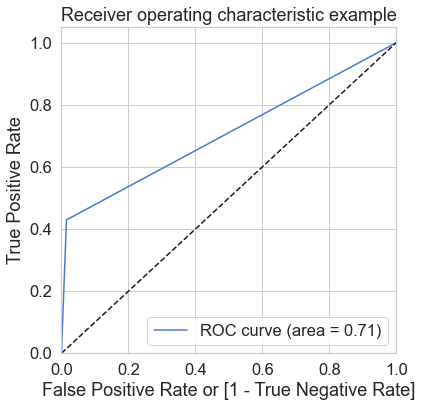

(array([0.        , 0.01499659, 1.        ]),
 array([0.        , 0.42948718, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [198]:

draw_roc(y_pred_final_xgb.PotentialFraud, y_pred_final_xgb.predicted_xgb)

In [199]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final_xgb.PotentialFraud, y_pred_final_xgb.predicted_xgb))

'0.71'

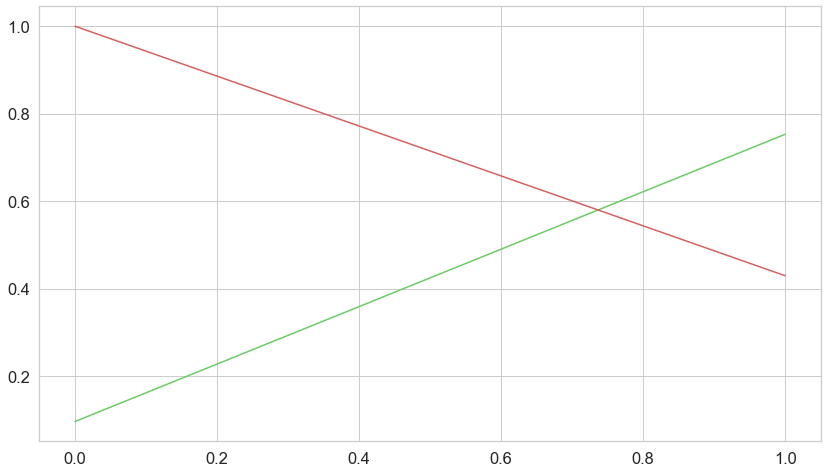

In [200]:
from sklearn.metrics import precision_recall_curve

y_pred_final_xgb.PotentialFraud, y_pred_final_xgb.predicted_xgb
p, r, thresholds = precision_recall_curve(y_pred_final_xgb.PotentialFraud, y_pred_final_xgb.predicted_xgb)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [201]:
from matplotlib import pyplot
from xgboost import plot_importance

# feature importance
print(model.feature_importances_)
# plot
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()

[0.02170433 0.02041134 0.03634035 0.03420815 0.24523413 0.02232114
 0.01512734 0.01178321 0.02855646 0.01558242 0.03136787 0.24289955
 0.15200254 0.01987162 0.01080816 0.01860432 0.01725811 0.02225737
 0.01719214 0.01646944]


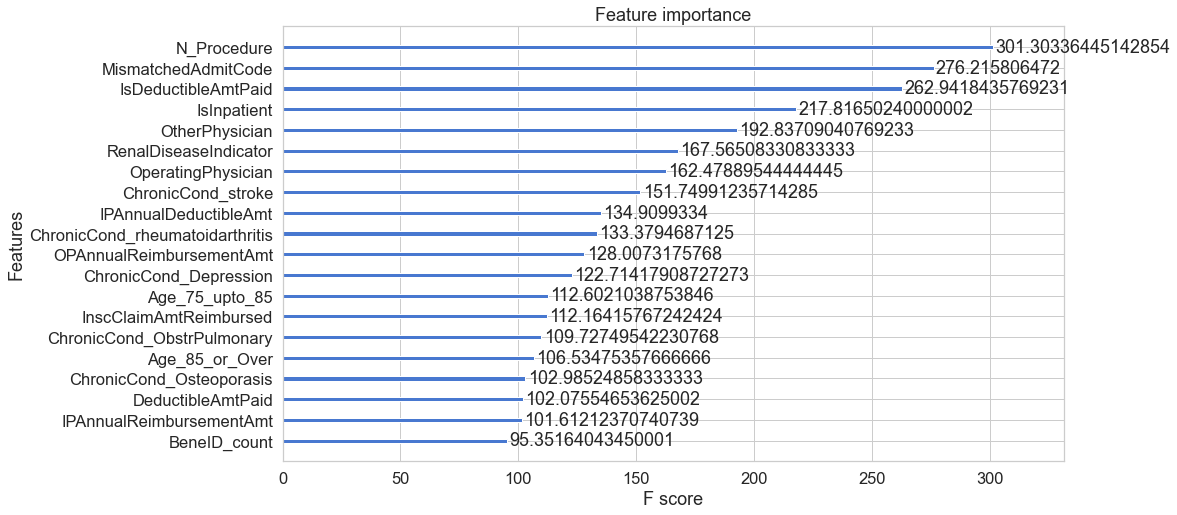

In [202]:
plot_importance(model,importance_type = "cover")

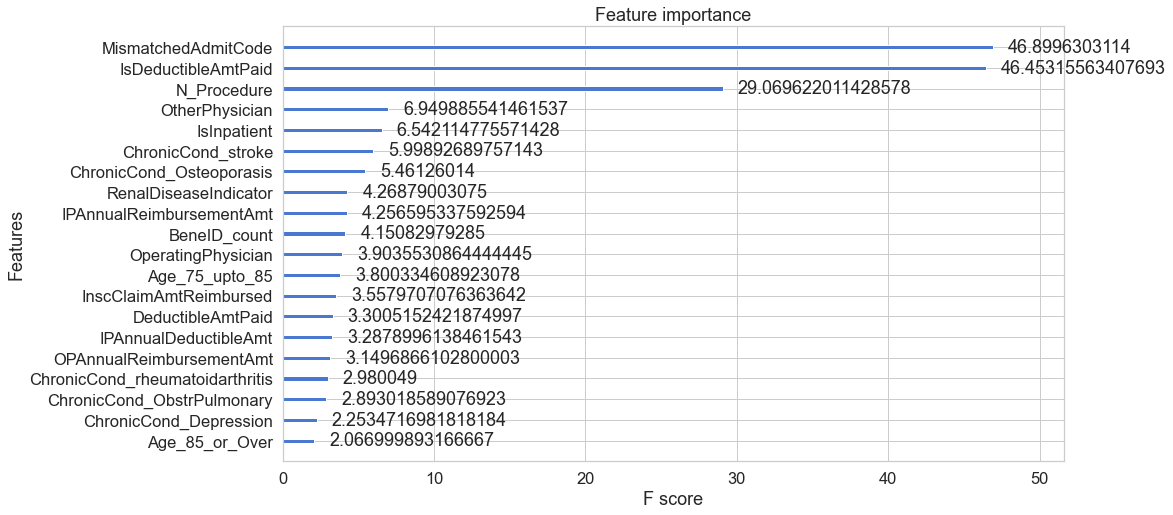

In [203]:
plot_importance(model,importance_type = "gain")

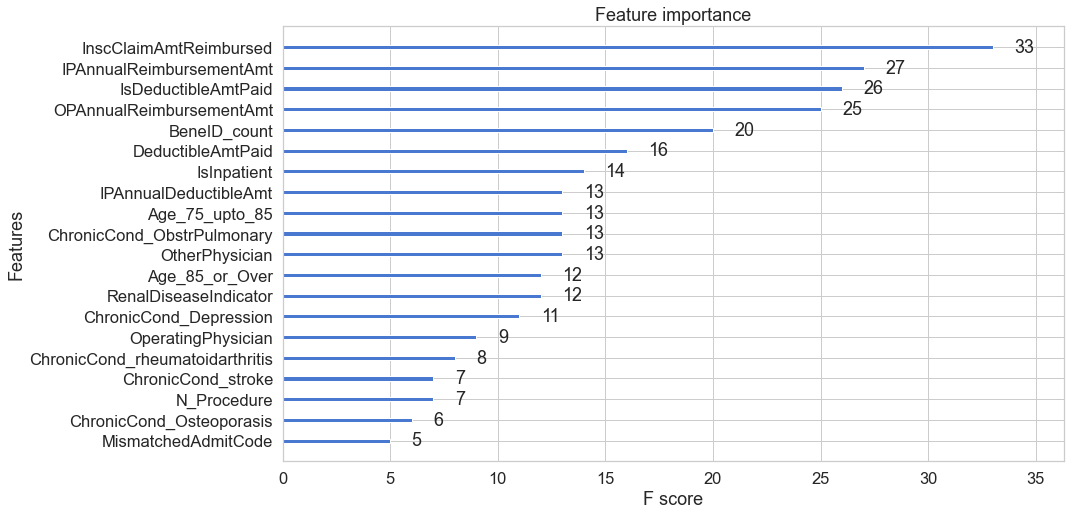

In [204]:
plot_importance(model,importance_type = "weight")

In [205]:

# compute SHAP values
explainer = shap.Explainer(model, background_fraud)
shap_values = explainer(X_train[col], check_additivity=False)

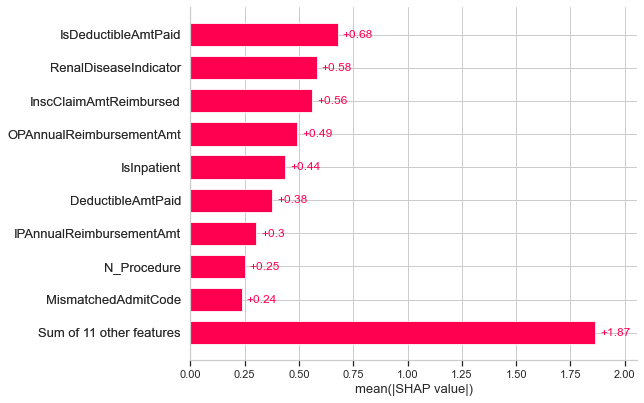

In [206]:
shap.plots.bar(shap_values)

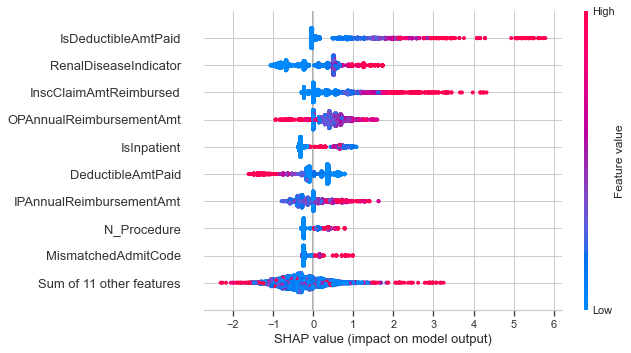

In [207]:
shap.plots.beeswarm(shap_values)

In [208]:
X_train.sort_values('AttendingPhysician', ascending = False)['AttendingPhysician']

Provider
PRV51459    8207
PRV54895    3426
PRV55215    3388
PRV52064    2834
PRV56011    2828
PRV55004    2391
PRV52649    2151
PRV54772    2108
PRV52628    2093
PRV51369    2081
PRV51347    2065
PRV55039    2049
PRV57103    2047
PRV51480    1919
PRV55467    1888
PRV54742    1885
PRV52041    1878
PRV54966    1792
PRV51836    1791
PRV56689    1789
PRV52340    1736
PRV54778    1668
PRV51567    1628
PRV54372    1612
PRV51433    1605
PRV56416    1588
PRV54075    1515
PRV51578    1497
PRV54350    1490
PRV52066    1450
PRV51244    1413
PRV52985    1400
PRV53786    1379
PRV54939    1377
PRV55977    1297
PRV52059    1284
PRV53895    1271
PRV52114    1264
PRV53750    1243
PRV52120    1231
PRV57173    1221
PRV53871    1217
PRV53394    1210
PRV52001    1175
PRV53670    1169
PRV51005    1163
PRV52077    1154
PRV56559    1111
PRV56268    1108
PRV56249    1107
PRV52631    1054
PRV54813    1053
PRV51509    1027
PRV51507    1013
PRV53702    1008
PRV52605     999
PRV54332     994
PRV55525     927
PRV57

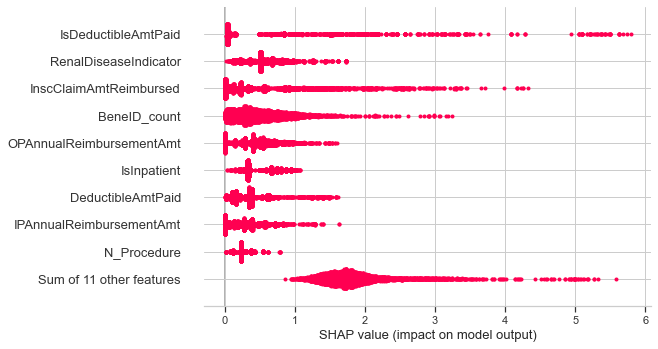

In [209]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

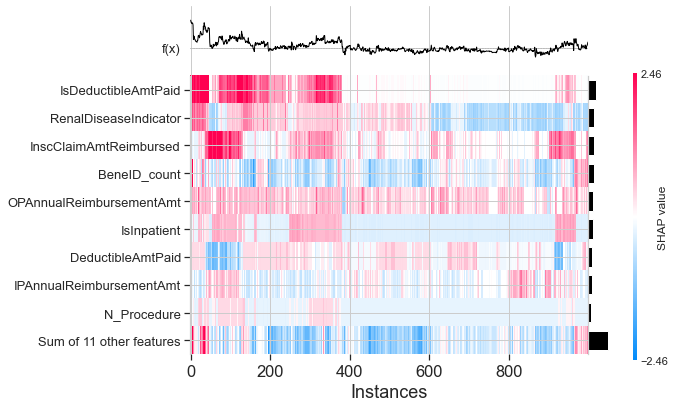

In [210]:
shap.plots.heatmap(shap_values[:1000])

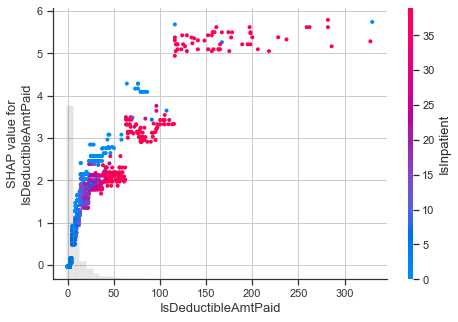

In [211]:
shap.plots.scatter(shap_values[:,"IsDeductibleAmtPaid"], color=shap_values)

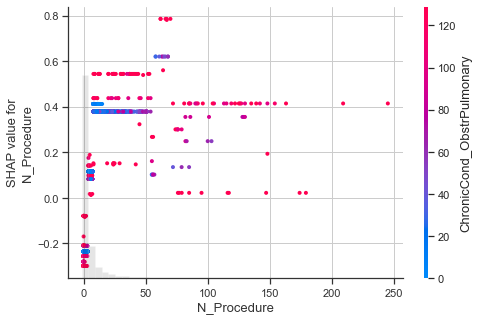

In [212]:
shap.plots.scatter(shap_values[:,"N_Procedure"], color=shap_values)

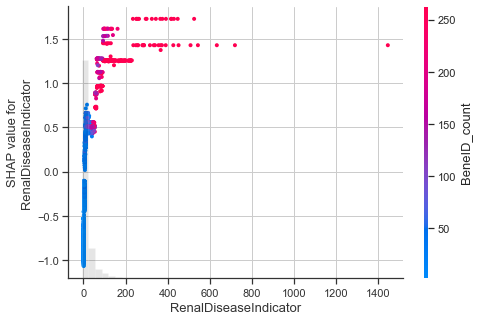

In [213]:
shap.plots.scatter(shap_values[:,"RenalDiseaseIndicator"], color=shap_values)

In [214]:
clustering = shap.utils.hclust(X_train, y_train)

44it [01:07,  1.53s/it]                                                                                                


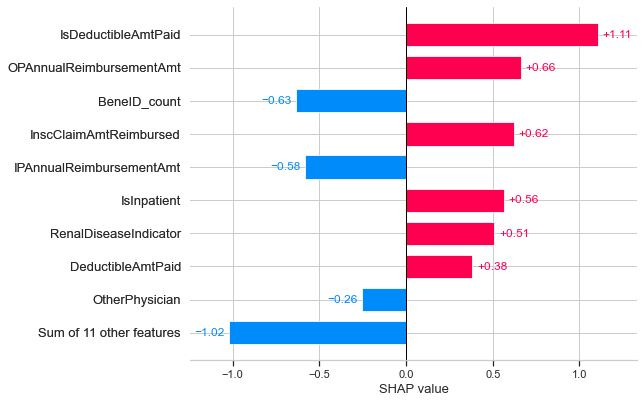

In [215]:
shap.plots.bar(shap_values[10])

In [216]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[10])

In [217]:
shap.initjs()
shap.plots.force(shap_values[900])

##  Random Forest

In [218]:
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np

### Loading data, training a model RandomForest

In [219]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(X_train[col], y_train)

RandomForestClassifier(n_estimators=500)

### Calculate Accuracy

In [220]:
sklearn.metrics.accuracy_score(y_test, rf.predict(X_test[col]))

0.929143561306223

In [221]:
# Predicted probabilities
y_pred_rf = model.predict(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df_rf = pd.DataFrame(y_pred_rf)

In [222]:
# Converting y_test to dataframe
y_test_df_rf = pd.DataFrame(y_test)
print(y_test_df_rf.head())
print(y_test_df_rf.info())

          PotentialFraud
Provider                
PRV52094               0
PRV57716               0
PRV54040               0
PRV53933               0
PRV51967               0
<class 'pandas.core.frame.DataFrame'>
Index: 1623 entries, PRV52094 to PRV57652
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PotentialFraud  1623 non-null   int64
dtypes: int64(1)
memory usage: 105.4+ KB
None


In [223]:
y_test_df_rf.reset_index(inplace=True)
print(y_test_df_rf.head(2))

   Provider  PotentialFraud
0  PRV52094               0
1  PRV57716               0


In [224]:
y_pred_final_rf = pd.concat([y_pred_df_rf,y_test_df_rf],axis=1)
y_pred_final_rf


0  Provider  PotentialFraud
0     0  PRV52094               0
1     0  PRV57716               0
2     0  PRV54040               0
3     0  PRV53933               0
4     0  PRV51967               0
5     0  PRV56055               0
6     0  PRV56930               0
7     0  PRV52998               0
8     0  PRV55276               0
9     0  PRV53799               0
10    0  PRV57143               0
11    0  PRV54050               0
12    0  PRV53680               0
13    0  PRV53377               0
14    0  PRV51521               0
15    0  PRV51344               0
16    0  PRV56638               0
17    0  PRV52837               0
18    0  PRV53203               0
19    0  PRV54362               0
20    0  PRV54355               0
21    0  PRV51025               0
22    0  PRV54832               1
23    0  PRV51669               0
24    0  PRV56614               0
25    0  PRV51342               0
26    0  PRV53593               0
27    1  PRV56556               0
28    0  PRV51368               0
29    1  PRV55676               1
30    0  PRV55527               0
31    0  PRV53405               0
32    0  PRV56853               0
33    0  PRV56066               0
34    0  PRV57611               0
35    0  PRV55940               0
36    0  PRV53050               0
37    0  PRV54120               0
38    0  PRV56674               0
39    0  PRV56981               0
40    0  PRV57752               0
41    0  PRV56912               0
42    0  PRV56073               0
43    0  PRV55307               0
44    0  PRV55356               0
45    0  PRV55013               0
46    0  PRV52518               0
47    0  PRV52555               0
48    0  PRV51224               0
49    0  PRV53274               0
50    0  PRV55208               0
51    0  PRV53605               0
52    1  PRV56748               1
53    0  PRV53066               0
54    0  PRV56965               0
55    0  PRV57574               0
56    0  PRV52530               0
57    0  PRV56239               0
58    0  PRV51383               0
59    0  PRV56920               0
60    0  PRV54840               0
61    0  PRV55744               0
62    1  PRV57191               1
63    1  PRV51456               0
64    0  PRV52860               1
65    0  PRV53843               0
66    0  PRV55603               0
67    0  PRV51708               0
68    0  PRV52617               0
69    0  PRV51727               0
70    0  PRV56863               0
71    0  PRV52276               0
72    0  PRV53997               0
73    0  PRV53136               1
74    0  PRV56052               0
75    0  PRV53208               1
76    0  PRV57104               1
77    0  PRV52964               0
78    0  PRV56750               0
79    0  PRV55807               0
80    0  PRV51313               0
81    0  PRV54887               0
82    0  PRV57435               0
83    0  PRV52651               0
84    0  PRV53801               0
85    0  PRV56584               0
86    0  PRV53171               0
87    0  PRV53229               0
88    0  PRV55205               0
89    0  PRV54623               0
90    0  PRV55764               0
91    0  PRV52013               0
92    0  PRV52745               0
93    0  PRV52697               0
94    0  PRV52201               0
95    0  PRV51672               0
96    0  PRV56696               0
97    0  PRV57461               0
98    0  PRV54290               0
99    0  PRV51721               0
100   0  PRV52193               0
101   0  PRV56772               0
102   0  PRV56908               0
103   0  PRV52411               0
104   0  PRV56405               0
105   0  PRV52409               0
106   1  PRV54925               1
107   0  PRV51024               0
108   0  PRV55390               0
109   0  PRV55635               0
110   0  PRV54881               0
111   0  PRV54635               0
112   0  PRV57426               0
113   0  PRV56058               0
114   0  PRV56046               0
115   0  PRV52527               0
116   0  PRV56622           

In [225]:
# Rearranging the columns

y_pred_final_rf= y_pred_final_rf.rename(columns={ 0 : 'predicted_rf'})
y_pred_final_rf

predicted_rf  Provider  PotentialFraud
0                0  PRV52094               0
1                0  PRV57716               0
2                0  PRV54040               0
3                0  PRV53933               0
4                0  PRV51967               0
5                0  PRV56055               0
6                0  PRV56930               0
7                0  PRV52998               0
8                0  PRV55276               0
9                0  PRV53799               0
10               0  PRV57143               0
11               0  PRV54050               0
12               0  PRV53680               0
13               0  PRV53377               0
14               0  PRV51521               0
15               0  PRV51344               0
16               0  PRV56638               0
17               0  PRV52837               0
18               0  PRV53203               0
19               0  PRV54362               0
20               0  PRV54355               0
21               0  PRV51025               0
22               0  PRV54832               1
23               0  PRV51669               0
24               0  PRV56614               0
25               0  PRV51342               0
26               0  PRV53593               0
27               1  PRV56556               0
28               0  PRV51368               0
29               1  PRV55676               1
30               0  PRV55527               0
31               0  PRV53405               0
32               0  PRV56853               0
33               0  PRV56066               0
34               0  PRV57611               0
35               0  PRV55940               0
36               0  PRV53050               0
37               0  PRV54120               0
38               0  PRV56674               0
39               0  PRV56981               0
40               0  PRV57752               0
41               0  PRV56912               0
42               0  PRV56073               0
43               0  PRV55307               0
44               0  PRV55356               0
45               0  PRV55013               0
46               0  PRV52518               0
47               0  PRV52555               0
48               0  PRV51224               0
49               0  PRV53274               0
50               0  PRV55208               0
51               0  PRV53605               0
52               1  PRV56748               1
53               0  PRV53066               0
54               0  PRV56965               0
55               0  PRV57574               0
56               0  PRV52530               0
57               0  PRV56239               0
58               0  PRV51383               0
59               0  PRV56920               0
60               0  PRV54840               0
61               0  PRV55744               0
62               1  PRV57191               1
63               1  PRV51456               0
64               0  PRV52860               1
65               0  PRV53843               0
66               0  PRV55603               0
67               0  PRV51708               0
68               0  PRV52617               0
69               0  PRV51727               0
70               0  PRV56863               0
71               0  PRV52276               0
72               0  PRV53997               0
73               0  PRV53136               1
74               0  PRV56052               0
75               0  PRV53208               1
76               0  PRV57104               1
77               0  PRV52964               0
78               0  PRV56750               0
79               0  PRV55807               0
80               0  PRV51313               0
81               0  PRV54887               0
82               0  PRV57435               0
83               0  PRV52651               0
84               0  PRV53801               0
85               0  PRV56584               0
86               0  PRV53171               0
87               0  PRV53229               0
8

In [226]:
print(classification_report(y_pred_final_rf.PotentialFraud, y_pred_final_rf.predicted_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1467
           1       0.75      0.43      0.55       156

    accuracy                           0.93      1623
   macro avg       0.85      0.71      0.75      1623
weighted avg       0.92      0.93      0.92      1623



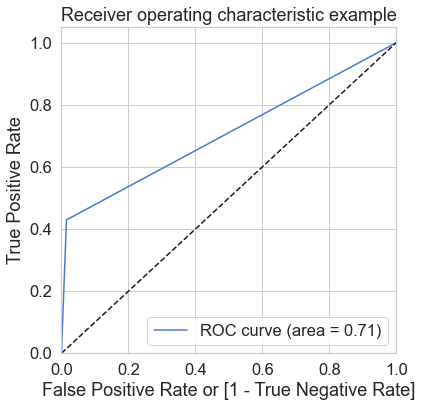

(array([0.        , 0.01499659, 1.        ]),
 array([0.        , 0.42948718, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [227]:
draw_roc(y_pred_final_rf.PotentialFraud, y_pred_final_rf.predicted_rf)

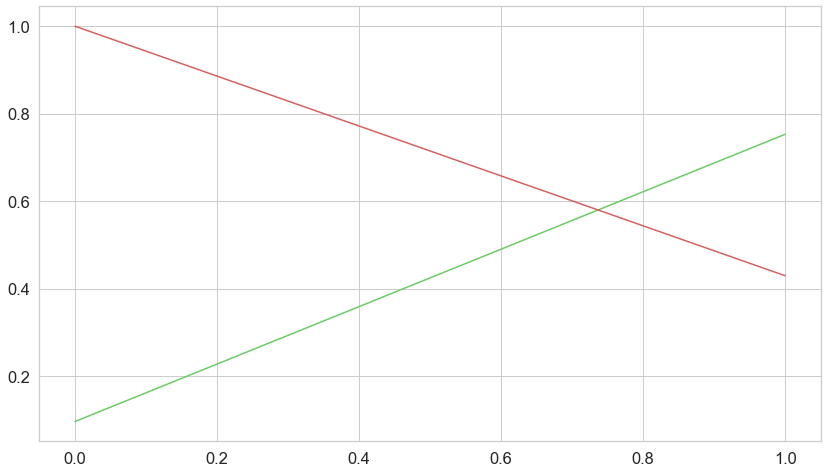

In [228]:
from sklearn.metrics import precision_recall_curve

y_pred_final_rf.PotentialFraud, y_pred_final_rf.predicted_rf
p, r, thresholds = precision_recall_curve(y_pred_final_rf.PotentialFraud, y_pred_final_rf.predicted_rf)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()